# SENTIMENT ANALYSIS


## CONTENTS

### (1) DATA CLEANING.........................................................................................................................................
### (2) EXPLORATORY DATA ANALYSIS..............................................................................................................
### (3) MODEL PREPARATION..............................................................................................................................
### (4) MODEL IMPLEMENTATION........................................................................................................................
### (5) RESULTS......................................................................................................................................................
### (6) BONUS PART........................ ......................................................................................................................

In [695]:
# IMPORTING ALL REQUIRED LIBRARIES AND FUNCTIONS..............................................................

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import preprocessing, linear_model
from sklearn.model_selection import KFold , GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.base import BaseEstimator
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec
try:
    import emoji #If tweepy is already installed on the system
except:
    !pip install emoji
try:
    import tweepy #If tweepy is already installed on the system
except:
    !pip install tweepy
import matplotlib.pyplot as plt
import scrapy
import requests
from scrapy import Selector
from selenium import webdriver 
from bs4 import BeautifulSoup
import urllib.request
import time
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 
from sklearn.neighbors import KNeighborsClassifier
sns.set()
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from gensim.models import word2vec
import sklearn.neural_network
from sklearn.neural_network import MLPClassifier as MLP

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Panch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Panch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Calling sentiment csv file

In [2]:
My_csv = ('Sentiment.csv') #calling sentiment csv file
df = pd.read_csv(My_csv) # converting csv file into dataframe

In [3]:
df.head(2) #printing first two rows of the dataframe

,sentiment,text
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ..."


In [4]:
df=df[['text','sentiment']] # changing the sequence of columns for convenience 
df.head(2)

,text,sentiment
0,RT @Diplomtc_Immnty: @realDonaldTrump They tri...,Positive
1,"@chiefy74 Damn i'm jealous, i wanna watch the ...",Negative


#### Calling Canadian election tweets csv file

In [5]:
ca = pd.read_csv('Canadian_elections_2019.csv') # converting canadian election tweets csv file into dataframe
ca.head(2)

,sentiment,negative_reason,text
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."


In [6]:
ca=ca[['text','negative_reason','sentiment']] #changing the sequence of columns for convenience 
ca.head()

,text,negative_reason,sentiment
0,"b""@RosieBarton So instead of your suggestion, ...",Women Reproductive right and Racism,Negative
1,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",NaN,Positive
2,"b""#Brantford It's going to cost YOU $94 BILLIO...",Economy,Negative
3,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",NaN,Positive
4,"b""#Canada #taxpayers are sick &amp; tired of h...",Economy,Negative


In [7]:
ca_tags = ca.copy()

In [8]:
#heshtag = re.findall(r'#', '',ca_tags.text )    

## (1) DATA CLEANING__________________________________________________________

### CLEANING THE SENTIMENT DATA

In [9]:
df['text'] = df['text'].apply(str) # To get the string representation of the "text" column

In [10]:
#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',  ############################################
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',     ##Defining different emoticons which can be#
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P', ##used in tweets so that we can filter it ##
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',    ## from our data set to clean the tweets ###
    '<3'                                                                        ############################################
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

emoticons = emoticons_happy.union(emoticons_sad)

#### Defining a function to remove urls from the tweets

In [11]:
def remove_url(text):
    url = re.sub(r'https?://\S+', '', text)
    return url

In [12]:
df['text'] = df['text'].apply(lambda x : remove_url(x)) #cleaning urls from the data

#### Defining a function to remove handles ('@') from the tweets

In [13]:
def remove_handles(text):
    handles = ' '.join(filter(lambda x:x[0]!='@', text.split()))
    return handles

In [14]:
df['text'] = df['text'].apply(lambda x : remove_handles(x)) #cleaning all handle names from tweets
df['text'].head(1)

0    RT They tried to take you out &amp; your poll ...
Name: text, dtype: object

#### Defining a function to remove retweet symbols ('RT') from the tweets

In [15]:
def remove_retweet(text): 
    url = re.sub(r'RT', '', text)
    return url

In [16]:
df['text'] = df['text'].apply(lambda x : remove_retweet(x)) # cleaning all RT symbols from the tweets

#### Defining a function to remove colons (:) from the tweets

In [17]:
def remove_colon(text):
    colon = re.sub(r':', '', text)
    return colon

In [18]:
df['text'] = df['text'].apply(lambda x : remove_colon(x)) #cleaning all colons after removing all RT from the tweets
df['text'].head(3)

0     They tried to take you out &amp; your poll nu...
1    Damn i'm jealous, i wanna watch the fight i lo...
2         I'm listening The Beatles now. They're great
Name: text, dtype: object

#### Defining a function to remove emoticons symbols from the tweets

In [19]:
def remove_emoticons(text):
    return emoji.get_emoji_regexp().sub(u'', text)

In [20]:
df['text'] = [i for i in df['text'] if not i in emoticons ]
df['text'] = [remove_emoticons(i) for i in df['text']]      # cleaning emoticons from the tweets
df['text'].head(1)

0     They tried to take you out &amp; your poll nu...
Name: text, dtype: object

#### Defining a function to remove punctuations from the tweets

In [23]:
def remove_punct(text):
    punct = "".join([i for i in text if i not in string.punctuation])
    return punct

In [24]:
df['text'] = df['text'].apply(lambda x : remove_punct(x)) #cleaning all punctuations from the tweets
df['text'].head(1)

0     They tried to take you out amp your poll numb...
Name: text, dtype: object

#### Defining a function to tokenize each words of the tweets

In [25]:
tokenizer = RegexpTokenizer(r'\w+')

In [26]:
df['text'] = df['text'].apply(lambda x : tokenizer.tokenize(x.lower())) # we use regular expression tokenizer to tokenize the tweets


In [27]:
df['text'].head(2)

0    [they, tried, to, take, you, out, amp, your, p...
1    [damn, im, jealous, i, wanna, watch, the, figh...
Name: text, dtype: object

#### Defining a function to remove stop words (the, a, an, to, in etc) from the tweets

In [28]:
def stop_word(text):
    stops = [i for i in text if i not in stopwords.words('english')]
    return stops

In [29]:
df['text'] = df['text'].apply(lambda x : stop_word(x)) # cleaning all stops words from the tweets

In [30]:
df['text'].head()

0    [tried, take, amp, poll, numbers, skyrocketed,...
1    [damn, im, jealous, wanna, watch, fight, love,...
2              [im, listening, beatles, theyre, great]
3    [could, please, get, shout, anything, im, huge...
4                [spotted, ur, message, tony, replied]
Name: text, dtype: object

#### Defining a function to convert all words from the tweets to their root words

In [31]:
stemmer = PorterStemmer()

In [32]:
def word_stem(text):
    stem = " ".join([stemmer.stem(i) for i in text])
    return stem

In [33]:
df['text'] = df['text'].apply(lambda x : word_stem(x)) # converting words to their root words

In [34]:
df['text'].head()

0    tri take amp poll number skyrocket voter matte...
1    damn im jealou wanna watch fight love ufc one ...
2                          im listen beatl theyr great
3    could pleas get shout anyth im huge fan cant w...
4                            spot ur messag toni repli
Name: text, dtype: object

### CLEANING THE CANADIAN ELECTION DATA

#### Defining a function to remove bytes symbol ( b" ) from the tweets

In [37]:
def remove_bytes(text):
    byt = re.sub(r'b"', '', text)
    return byt

In [38]:
ca['text'] = ca['text'].apply(lambda x : remove_bytes(x)) # cleaning bytes symbols 
ca['text'].head(2)

0    @RosieBarton So instead of your suggestion, ho...
1    #AllWomanSpacewalk it's real!\n@Space_Station ...
Name: text, dtype: object

In [39]:
ca['text'] = ca['text'].apply(lambda x : remove_url(x))                  # cleaning urls

ca['text'] = ca['text'].apply(lambda x : remove_handles(x))              # cleaning all handles

ca['text'] = ca['text'].apply(lambda x : remove_retweet(x))              # cleaning retweet symbols

ca['text'] = ca['text'].apply(lambda x : remove_colon(x))                # cleaning colons

ca['text'] = [i for i in ca['text'] if not i in emoticons ]              # cleaning emoticons
ca['text'] = [remove_emoticons(i) for i in ca['text']]

ca['text'] = ca['text'].apply(lambda x : remove_punct(x))                # cleaning punctuation marks

ca['text'] = ca['text'].apply(lambda x : tokenizer.tokenize(x.lower()))  # rokenizing tweets

ca['text'] = ca['text'].apply(lambda x : stop_word(x))                   # cleaning stop word

ca['text'] = ca['text'].apply(lambda x : word_stem(x))                   # stemming word to convert them into their rootwords

In [40]:
ca.head(2)

,text,negative_reason,sentiment
0,instead suggest agre canadian women trust andr...,Women Reproductive right and Racism,Negative
1,allwomanspacewalk realnspacest netobicokenorth...,NaN,Positive


In [41]:
df.isnull().sum(axis=0) # checking null values in sentiment data

text         0
sentiment    0
dtype: int64

In [42]:
ca.isnull().sum(axis=0) # checking null values in canadian data

text                  0
negative_reason    1126
sentiment             0
dtype: int64

## (2) DATA EXPLORATION____________________________________________________ 

### WEB SCRAPPING  FOR DIFFERENT PARTIES TO GET THEIR MPS NAMES

### WEB SCRAPPING FOR CONSERVATIVE PARTY

In [43]:
## senators' names ##
senator=" https://www.conservative.ca/team/senators/"          

html = requests.get(senator).content
sel = Selector(text=html)

cons_senator=sel.xpath('//div[@class="cabinet-flex-content"]/h3/text()').extract() # extracting senators' names

## MPs' names ##
MPs=" https://www.conservative.ca/team/mps/"

html1 = requests.get(MPs).content
sel1 = Selector(text=html1)

cons_mps=sel1.xpath('//div[@class="cabinet-flex-content"]/h3/text()').extract() # extracting MPs' names

## National council members' names ##
national_council="https://www.conservative.ca/team/national-council/"

html2 = requests.get(national_council).content
sel2 = Selector(text=html2)

cons_national_council = sel2.xpath('//div[@class="committee-member"]/h3/text()').extract() # extracting national council members' names

In [44]:
conservative = cons_senator+cons_mps+cons_national_council # making one list of all conservative party's members

### WEB SCRAPPING FOR LIBERAL PARTY

In [45]:
mp_liberal="https://www2.liberal.ca/your-liberal-mps/"

html_l = requests.get(mp_liberal).content
sel_l = Selector(text=html_l)

liberal = sel_l.xpath('//h2[@class="person__name"]/text()').extract() # extracting liberal party's all members names


### WEB SCRAPPING FOR NDP PARTY

In [46]:
mp_NDP="https://www.ndp.ca/team"

html_n = requests.get(mp_NDP).content
sel_n = Selector(text=html_n)

NDP = sel_n.xpath('//div[@class="campaign-civics-list-title civic-name"]/text()').extract() # extracting NDP party's all members names

In [47]:
##########################################################################################################################
################################ ADDING SOME MORE WORDS TO THE LISTS OF ALL THE PARTIES###################################
##########################################################################################################################

party1=[ "liberals" ]
l1 = ['liberal']
l2 = ['justin']
l3 = ['trudeau']
l4 = ['lpc']
word_l1 = ['choose forward']
party2= ["conservatives"]
c1 = ["conservative"]
c2 = ['andrew']
c3 = ['scheer']
c4 = ['leona']
c5 = ['alleslev']
word_c1 =['It time for you to get ahead']
party3=["ndp"]
word_n1=['co operative commonwealth federation']
word_n2=['ccf']
word_n3=['canadian labour congress']
word_n4=['clc']
word_n5=['on your side']
word_n6=['a new deal for people']
n1 = ['jagmeet']
n2 = ['singh']
n3 = ['tommy']
n4 = [' douglas']

liberal.extend(party1)              # appending extra words to liberal party
liberal.extend(l1)
liberal.extend(l2)
liberal.extend(l3)
liberal.extend(l4)
liberal.extend(word_l1)        
conservative.extend(party2)         # appending extra words to liberal party
conservative.extend(word_c1)
conservative.extend(c1)
conservative.extend(c2)
conservative.extend(c3)
conservative.extend(c4)
conservative.extend(c5)
NDP.extend(party3)                  # appending extra words to liberal party
NDP.extend(word_n1)
NDP.extend(word_n2)
NDP.extend(word_n3)
NDP.extend(word_n4)
NDP.extend(word_n5)
NDP.extend(word_n6)
NDP.extend(n1)
NDP.extend(n2)
NDP.extend(n3)
NDP.extend(n4)


In [48]:
conservative = [ i.strip('Hon.') for i in conservative]         # removing "Hon." suffix from conservative party list

######################################### cleaning data in parties list####################################################
liberal = [ i.replace(" ", "") for i in liberal]
conservative = [ i.replace(" ", "") for i in conservative]
NDP= [ i.replace(" ", "") for i in NDP]

In [49]:
#converting all words into lowercase

liberal = [ i.lower() for i in liberal]
conservative = [ i.lower() for i in conservative]
NDP = [ i.lower() for i in NDP]

In [50]:
ca['Party'] = ' ' # creating a new column for parties

In [51]:
for l in liberal:                            # searching for a liberal party's tweets
    for i in range(len(ca.text)):
        if l in ca.text[i]:
            ca['Party'][i]='Liberal'

In [52]:
for c in conservative:                       # searching for a conservative party's tweets
    for i in range(len(ca.text)):
        if c in ca.text[i]:
            ca['Party'][i]='Conservative'

In [53]:
for n in NDP:                                # searching for a NDP party's tweets
    for i in range(len(ca.text)):
        if n in ca.text[i]:
            ca['Party'][i]='NDP'

In [54]:
ca['Party'] = ca['Party'].replace(r' ','No Party')  # Replacing NaN values with "No Party" tag

In [55]:
ca['Party'].value_counts()  # Tweets total count for different parties 

No Party        1233
Conservative     338
Liberal          337
NDP              225
Name: Party, dtype: int64

#### PLOT (1) : PARTIES DISTRIBUTION BASED ON THE SENTIMENTS OF THE TWEET

In this plot, I have represented different parties' total counts of positive(1) and negative(0) sentiments. It can be seen that
liberal party has highest positive sentiment tweets if we neglect "No Party" counts whereas Conservative party has highest number of negative sentiment tweets and lowest number of positive sentiment tweets. NDP has least number of negative sentiment tweets. This plot is complying with the real facts only for liberal party as it has highet number of positive tweets.  

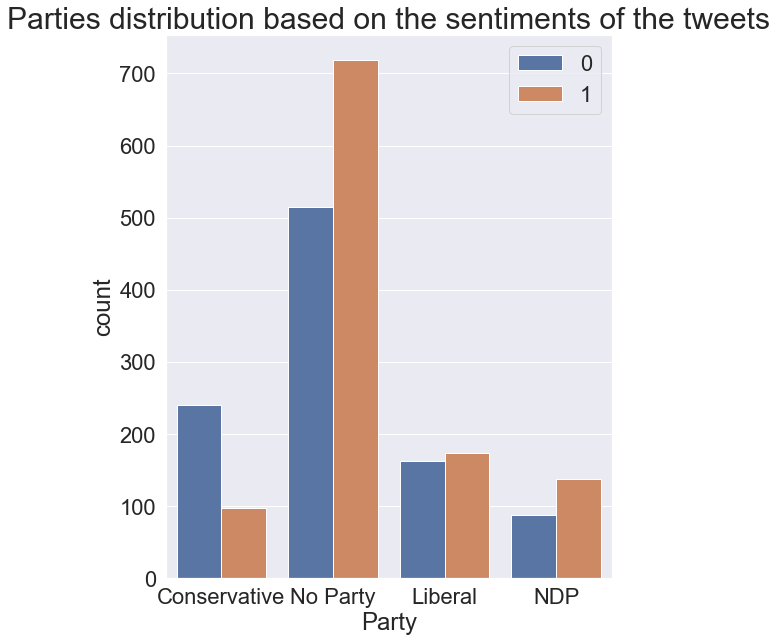

In [166]:
sns.countplot(x='Party',data=ca, hue = 'sentiment')
sns.set(rc={'figure.figsize':(8,10)})
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
plt.legend(loc=1)
plt.title('Parties distribution based on the sentiments of the tweets', fontsize = 30)
plt.show() 

#### PLOT (2) : NEGATIVE TWEET REASON'S BREAKDOWN

This plot represents the breakdown of all negative reasons of the canadian election dataset. It can be seen that "Women Reproductive Right and Racism" is the major reason of the negative sentiments in tweets and "Economy" is the second most negative reason whereas "Healthcare and Marijuana","Healthcare" and "Separation" has very negligible contributon in total negative reasons.    

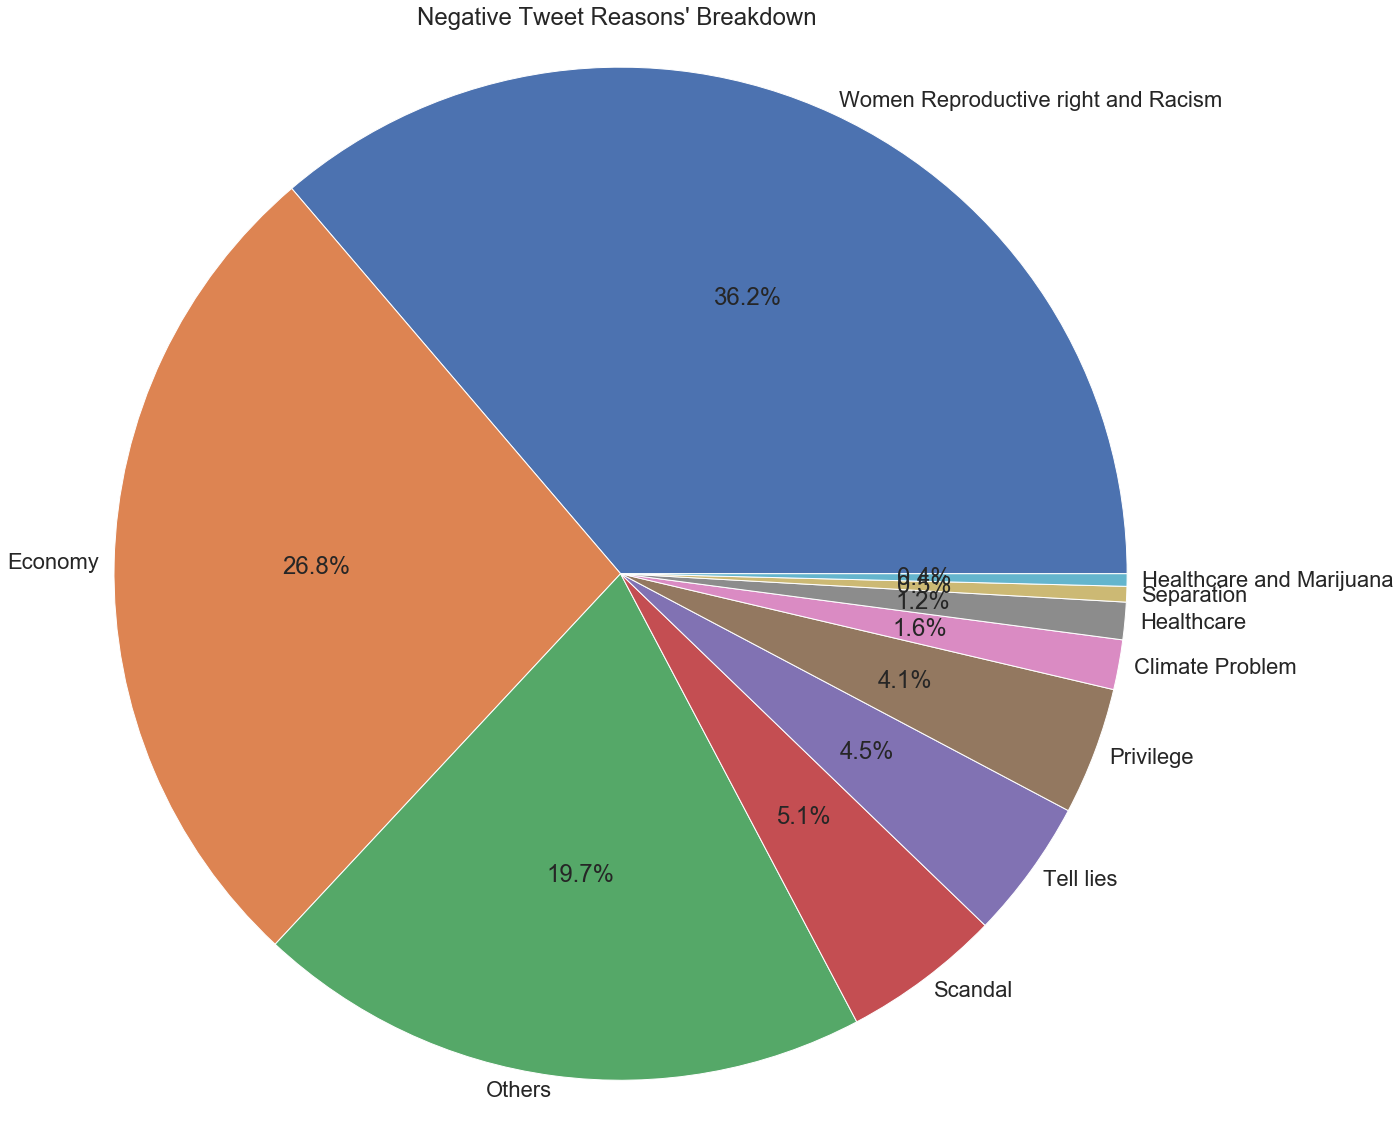

In [57]:
percent = ca['negative_reason'].dropna().value_counts(normalize=True)*100
labels=ca['negative_reason'].dropna().unique()
fig = plt.figure(figsize=[20,20])
ax = fig.add_subplot(111)
ax.pie(percent,labels=labels,autopct='%1.1f%%',labeldistance=1.03)
ax.set_title("Negative Tweet Reasons' Breakdown ")
ax.axis('equal')
plt.show()

#### PLOT (3) : POSITIVE WORDS IN TWEETS

This is the wordcloud for positive words in positive sentiment tweets. It can be seen that it consists of positive words. (i.e.love, good,haha,fun,well,sweet,play, amaze etc)

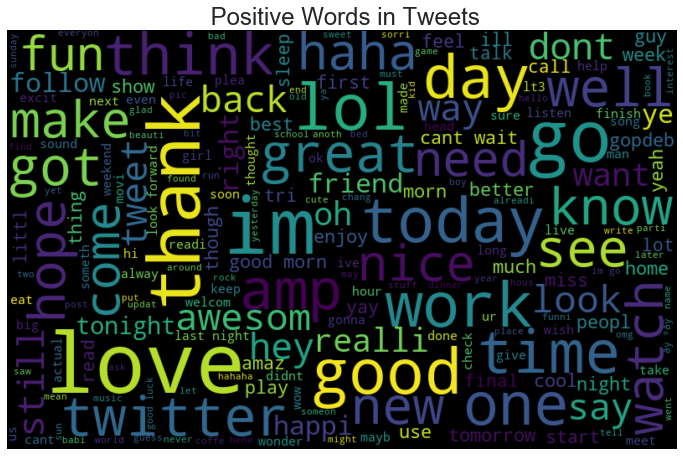

In [58]:
positive = df[df['sentiment'] == 'Positive']
words = " ".join([words for words in positive['text']])
wordcloud = WordCloud(width=800, height=500, background_color ='black', random_state=0, max_font_size=100).generate(words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(" Positive Words in Tweets")
plt.show()

#### PLOT (4) : NEGATIVE WORDS IN TWEETS

In this wordcloud, I represented Negative words in negative tweets. Except some of the positive words, it can be seen that there are so many negative words.(i.e. won't, stupid, sorry, cant , sad, mean etc)

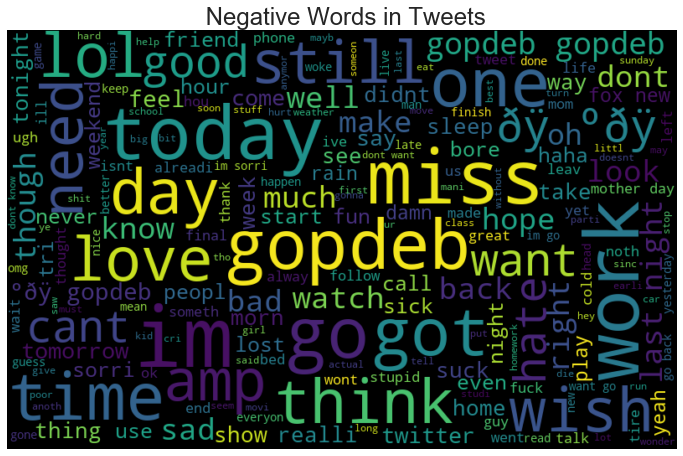

In [59]:
negative = df[df['sentiment'] == 'Negative']
words_n = " ".join([words for words in negative['text']])
wordcloud = WordCloud(width=800, height=500, background_color ='black', random_state=0, max_font_size=100).generate(words_n)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(" Negative Words in Tweets")
plt.show()

#### PLOT (5) : TWEETS' DISTRIBUTION ACCORDING TO SENTIMENTS

In this plot, I depicted distribution of tweets according to sentiments of sentiment dataset. This shows that there are more negative tweets compare to positive tweets. There are a few neutral tweets also.

Text(0.5, 1.0, "Tweets' distribution according to sentiments")

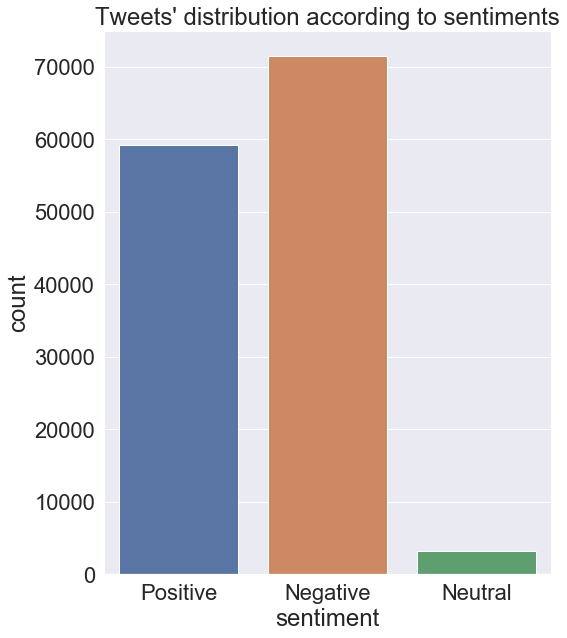

In [60]:
sns.countplot(x='sentiment',data=df)
sns.set(rc={'figure.figsize':(10,8)})
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
plt.title("Tweets' distribution according to sentiments")

## (3) MODEL PREPARATION___________________________________________________

In [61]:
# we have to predict only positive and negative tweets. so we are removing neutral tweets.
df1 = df[df.sentiment != 'Neutral'] 

df1.reset_index(drop=True, inplace=True) # resetting index of the dataset after removing neutral tweets

In [62]:
# Label encoding the target data for sentiment dataset
sentiments = {'Positive': 1,'Negative': 0}
df1.sentiment = [sentiments[i] for i in df1.sentiment]


C:\Users\Panch\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [63]:
# Label encoding the target data for canadian election dataset

ca.sentiment = [sentiments[i] for i in ca.sentiment]

In [64]:
ca.head()

,text,negative_reason,sentiment,Party
0,instead suggest agre canadian women trust andr...,Women Reproductive right and Racism,0,Conservative
1,allwomanspacewalk realnspacest netobicokenorth...,NaN,1,No Party
2,brantford go cost 94 billion next 4 year ask j...,Economy,0,Liberal
3,canada canadaelection2019 canadavot nelxn43 nn...,NaN,1,No Party
4,canada taxpay sick amp tire hard earn donat co...,Economy,0,Liberal


### MODEL PREPARATION WITH TF-IDF 

#### TF (TERM FREQUENCY) : A number of times a word appears in a document divided by the total number of words in the document. 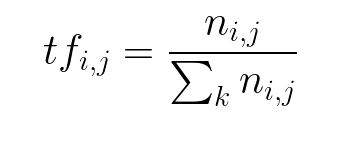

#### IDF (INVERSE DATA FREQUENCY) : It is the log of the total number of documents divided by the number of documents that contain particular word. 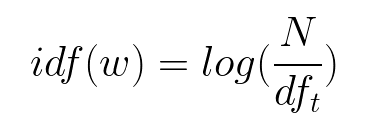

#### TF - IDF : It is multiplication of TF and IDF.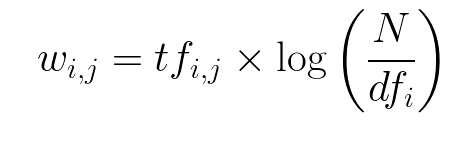
#### Source: https://towardsdatascience.com/

#### TF-IDF extracts features from the text data. It converts the text data into numbers based on its term frequency and also gives weight to rare words so that we can input the data for model implementation. 

In [65]:
# Converting text data of sentiment data set into TF-IDF
vectorizer = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word',stop_words="english", 
                            ngram_range=(1, 1), max_df=0.9, min_df=1, max_features=1000)
tf = vectorizer.fit_transform(df1.text)

In [66]:
# Converting text data of canadian election data set into TF-IDF
vectorizer_ca = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word',stop_words="english", 
                            ngram_range=(1, 1), max_df=0.9, min_df=1, max_features=1000)
tf_ca = vectorizer_ca.fit_transform(ca.text)

In [67]:
X = tf              # feature set for sentiment dataset
y = df1.sentiment   # target set for sentiment dataset

In [68]:
X_ca = tf_ca        # feature set for canadian election dataset
y_ca = ca.sentiment # target set for canadian election dataset

In [69]:
# Split the sentiment data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### MODEL PREPARATION WITH WF

#### WF (WORD FREQUENCY) : This simply gives an encoded vector with a length of entire vocabulary of the documents and an integer count for the number of times each word appeared in the document.

In [70]:
# Converting text data of sentiment data set into WF
count_vect = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=0.9, min_df=1, max_features=1000)

wf = count_vect.fit_transform(df1.text)

In [71]:
# Converting text data of canadian election data set into TF-IDF
count_vect_ca = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=0.9, min_df=1, max_features=1000)

wf_ca = count_vect_ca.fit_transform(ca.text)

In [72]:
X1 = wf                     # feature set for sentiment dataset with wf
y1 = df1.sentiment          # target set for sentiment dataset with wf

In [73]:
# Split the data into 30% test and 70% training
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [74]:
X_ca_wf = wf_ca            # feature set for canadian election dataset with wf
y_ca_wf = ca.sentiment     # feature set for canadian election dataset with wf

## (4) MODEL IMPLEMENTATION_________________________________________________

**BELOW ARE THE MODELS, I HAVE IMPLEMENTED.**

1) LOGISTIC REGRESSION

2) KNN

3) MULTINOMIAL NAIVE BAYES

4) DECISION TREE CLASSIFIER

5) RANDOM FOREST CLASSIFIER

6) XGBOOST CLASSIFIER

7) SUPPORT VECTOR CLASSIFIER


### 1) LOGISTIC REGRESSION WITH TF-IDF

In [75]:
logistic = LogisticRegression() # calling logistic regression model

In [76]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

In [77]:
C = [0.001,0.01,0.05,0.1,0.5,1,5,10, 100] # list of all learning rate
#solver =  ['newton-cg','lbfgs','liblinear','sag','saga']
hyperparameters = dict(C=C) # making dictionary of all hyperparameters

In [78]:
tuning = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0) #applying GridSearchCV to model

In [79]:
best_model = tuning.fit(X_train, y_train) # tuning the training data with best hyperparameters

In [80]:
# printing best parameters of all models
print('Best C for model:', best_model.best_estimator_.get_params()['C'])
print('Best solver for model:', best_model.best_estimator_.get_params()['solver'])

Best C for model: 0.01
Best solver for model: lbfgs


In [81]:
# Training the data with best parameters
best_logistic = LogisticRegression(C = 0.01 ,solver='lbfgs', random_state=0)
best_logistic.fit(X_train, y_train)
probability = best_logistic.predict_proba(X_test)*100

In [82]:
prediction = best_logistic.predict(X_test) # predicting test data
print(classification_report(y_test, prediction)) # classification report of the model

              precision    recall  f1-score   support

           0       0.77      0.74      0.76     21436
           1       0.70      0.73      0.72     17765

    accuracy                           0.74     39201
   macro avg       0.74      0.74      0.74     39201
weighted avg       0.74      0.74      0.74     39201



In [83]:
# finding accuracy on test data
score = round(accuracy_score(y_test, prediction) * 100  , 3)

print ('The accuracy of the model is:', score, "%")

The accuracy of the model is: 73.952 %


**Logistic regression for canadian dataset (TF-IDF)**

In [84]:
prediction_ca =  best_logistic.predict(X_ca)  #predicting the sentiments of canadian election tweets
print(classification_report(y_ca , prediction_ca)) # checking accuracy of the model

              precision    recall  f1-score   support

           0       0.48      0.65      0.55      1006
           1       0.54      0.36      0.43      1127

    accuracy                           0.50      2133
   macro avg       0.51      0.50      0.49      2133
weighted avg       0.51      0.50      0.49      2133



In [85]:
# finding accuracy of the model by predicting canadian dataset tweets' sentiments
score = round(accuracy_score(y_ca , prediction_ca) * 100  , 3)

print ('The accuracy of the model is:', score, "%")

The accuracy of the model is: 49.648 %


### LOGISTIC REGRESSION WITH WF

In [86]:
logistic_wf = LogisticRegression(C = 0.001 ,solver='lbfgs', random_state=0)
logistic_wf.fit(X1_train, y1_train) # traing WF features with logistic model

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
prediction_wf = logistic_wf.predict(X1_test) # predicting test data
print(classification_report(y1_test, prediction_wf))

              precision    recall  f1-score   support

           0       0.65      0.90      0.75     21436
           1       0.77      0.42      0.54     17765

    accuracy                           0.68     39201
   macro avg       0.71      0.66      0.65     39201
weighted avg       0.70      0.68      0.66     39201



In [88]:
# finding accuracy of the model with wf features 
score = round(accuracy_score(y1_test, prediction_wf) * 100  , 3)

print ('The accuracy of the model is:', score, "%")

The accuracy of the model is: 68.003 %


**Logistic regression for canadian dataset (WF)**

In [89]:
prediction_ca_wf =  logistic_wf.predict(X_ca_wf) # predicting canadian election datasets data
print(classification_report(y_ca_wf , prediction_ca_wf))

              precision    recall  f1-score   support

           0       0.47      0.96      0.63      1006
           1       0.58      0.05      0.10      1127

    accuracy                           0.48      2133
   macro avg       0.53      0.50      0.37      2133
weighted avg       0.53      0.48      0.35      2133



In [90]:
# finding accuracy of the model based on wf for canadian election dataset
score = round(accuracy_score(y_ca_wf , prediction_ca_wf) * 100  , 3)

print ('The accuracy of the model is:', score, "%")

The accuracy of the model is: 47.914 %


### 2) KNN WITH TF-IDF

In [339]:
# tuning number of neighbors in KNN classifier 
n = [1,3,5,10,15]
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("n_neighbors", i)
    print("Accuracy score of the KNN classifier : {0:.3f}".format(accuracy_score(y_test, y_pred) * 100), '%')

n_neighbors 1
Accuracy score of the KNN classifier : 64.121 %
n_neighbors 3
Accuracy score of the KNN classifier : 65.702 %
n_neighbors 5
Accuracy score of the KNN classifier : 66.366 %
n_neighbors 10
Accuracy score of the KNN classifier : 67.401 %
n_neighbors 15
Accuracy score of the KNN classifier : 68.350 %


In [340]:
#fitting best parameter in the model

knn = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [341]:
confusion_matrix(y_test, y_pred) # confusion matrix for knn model

array([[13752,  7684],
       [ 4723, 13042]], dtype=int64)

In [342]:
#accuracy of the model

score = round(accuracy_score(y_test, y_pred) * 100  , 3)

print ('The accuracy of the model is:', score, "%")

The accuracy of the model is: 68.35 %


#### KNN classifier for canadian election dataset (TF-IDF)


In [343]:
# predicting sentiments for canadian election dataset

y_pred_ca = knn.predict(X_ca)
confusion_matrix(y_ca, y_pred_ca)

array([[465, 541],
       [494, 633]], dtype=int64)

In [344]:
# checking accuracy for canadian election dataset

score = round(accuracy_score(y_ca, y_pred_ca) * 100  , 3)

print ('The accuracy of the model is:', score, "%")

The accuracy of the model is: 51.477 %


### KNN with WF

In [345]:
# fitting best model to WF features

knn.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [346]:
# predicting target value

y_pred_wf = knn.predict(X1_test)

In [347]:
confusion_matrix(y1_test, y_pred_wf) #finding confusion matrix for KNN (WF) model

array([[14034,  7402],
       [ 4887, 12878]], dtype=int64)

In [348]:
# accuracy of KNN (WF) model for sentiment dataset
score = round(accuracy_score(y1_test, y_pred_wf) * 100  , 3)

print ('The accuracy of the model is:', score, "%")

The accuracy of the model is: 68.651 %


#### KNN classifier for canadian election dataset (WF)

In [349]:
# predicting sentiments for canadian election dataset
y_pred_ca_wf = knn.predict(X_ca_wf)
confusion_matrix(y_ca_wf, y_pred_ca_wf)

array([[666, 340],
       [742, 385]], dtype=int64)

In [350]:
#checking accuracy with canadian dataset
score = round(accuracy_score(y_ca_wf, y_pred_ca_wf) * 100  , 3)

print ('The accuracy of the model is:', score, "%")

The accuracy of the model is: 49.273 %


### 3) MULTINOMIAL NAIVE BAYES WITH TF-IDF

In [103]:
# defining a model 
naive = MultinomialNB()

In [104]:
# fitting tf-idf features

naive.fit(X_train.toarray(), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [105]:
# predicting sentiments for sentiment dataset
naive_pred = naive.predict(X_test.toarray())

In [353]:
# finding accuracy of the model with sentiment data with tf-idf
print("Accuracy of Naive Bayes Multinomial Model for TF-IDF sentiment dataset is :",metrics.accuracy_score(y_test, naive_pred )*100, "%")

Accuracy of Naive Bayes Multinomial Model for TF-IDF sentiment dataset is : 72.584883038698 %


#### Naive Bayes classifier with canadian election dataset (TF-IDF)

In [354]:
# predicting sentiments for canadian data set (tf-idf)
naive_pred_ca = naive.predict(X_ca.toarray())

In [355]:
# finding accuracy for naive bayes classifier for sentiment dataset
print("Accuracy of Naive Bayes Multinomial Model for TF-IDF canadian dataset is :",metrics.accuracy_score(y_ca, naive_pred_ca )*100, "%")

Accuracy of Naive Bayes Multinomial Model for TF-IDF canadian dataset is : 49.6952648851383 %


### NAIVE BAYES CLASSIFIER WITH WF

In [109]:
# calling model
naive_wf = MultinomialNB()

In [110]:
# fitting sentiment taining set to the model
naive_wf.fit(X1_train.toarray(), y1_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [111]:
#predicting target variables
naive_pred_wf = naive_wf.predict(X1_test.toarray())

In [351]:
#finding accuracy for sentiment dataset with WF
print("Accuracy of Naive Bayes Multinomial Model for WF sentiment dataset is :",metrics.accuracy_score(y1_test, naive_pred_wf )*100, "%")

Accuracy of Naive Bayes Multinomial Model for WF sentiment dataset is : 73.00068875793984 %


#### Naive Bayes Classifier with canadian election dataset (WF)

In [113]:
# predicting sentiments for canadian dataset
naive_pred_ca_wf = naive_wf.predict(X_ca.toarray())

In [352]:
# finding accuracy of Naive Bayes Multinomial Model for WF canadian dataset
print("Accuracy of Naive Bayes Multinomial Model for WF canadian dataset is :",metrics.accuracy_score(y_ca, naive_pred_ca_wf)*100, "%")

Accuracy of Naive Bayes Multinomial Model for WF canadian dataset is : 49.789029535864984 %


### 4) DECISION TREE CLASSIFIER WITH TF-IDF

In [115]:
# tuning max_depth parameter to get best accuracy
depth = [1,5,10,15,20,25,35,45,50,100]
for i in depth:
    dt = DecisionTreeClassifier(max_depth = i, random_state = 0) # calling decision treee classifier
    dt.fit(X_train, y_train) # fitting our model to train data
    prediction_dt = dt.predict(X_test)
    print("max_depth", i)
    print("Accuracy score of the decision tree classifier : {0:.3f}".format(dt.score(X_test,y_test)*100), '%')

max_depth 1
Accuracy score of the decision tree classifier : 56.825 %
max_depth 5
Accuracy score of the decision tree classifier : 58.529 %
max_depth 10
Accuracy score of the decision tree classifier : 60.238 %
max_depth 15
Accuracy score of the decision tree classifier : 61.009 %
max_depth 20
Accuracy score of the decision tree classifier : 62.743 %
max_depth 25
Accuracy score of the decision tree classifier : 63.162 %
max_depth 35
Accuracy score of the decision tree classifier : 65.264 %
max_depth 45
Accuracy score of the decision tree classifier : 66.468 %
max_depth 50
Accuracy score of the decision tree classifier : 66.878 %
max_depth 100
Accuracy score of the decision tree classifier : 67.876 %


In [116]:
dt = DecisionTreeClassifier(max_depth = 100, random_state = 0) # calling decision treee classifier
dt.fit(X_train, y_train) # fitting our model to train data
prediction_dt = dt.predict(X_test) # predicitng target values

In [117]:
# classification report for sentiment dataset
print(classification_report(y_test, prediction_dt))

              precision    recall  f1-score   support

           0       0.77      0.58      0.67     21436
           1       0.61      0.79      0.69     17765

    accuracy                           0.68     39201
   macro avg       0.69      0.69      0.68     39201
weighted avg       0.70      0.68      0.68     39201



#### Decision tree classifier for canadian election dataset (TF-IDF)

In [118]:
# predicting sentiments and finding accuracy of canadian election dataset (TF-IDF)
prediction_dt_ca = dt.predict(X_ca)
print(classification_report(y_ca, prediction_dt_ca))

              precision    recall  f1-score   support

           0       0.54      0.40      0.46      1006
           1       0.57      0.70      0.62      1127

    accuracy                           0.56      2133
   macro avg       0.55      0.55      0.54      2133
weighted avg       0.55      0.56      0.55      2133



### DECISION TREE CLASSIFIER WITH WF

In [119]:
# tuning max_depth parameter to get best accuracy
depth = [1,5,10,15,20,25,35,45,50,100]
for i in depth:
    dt_wf = DecisionTreeClassifier(max_depth = i, random_state = 0) # calling decision treee classifier
    dt_wf.fit(X1_train, y1_train) # fitting our model to train data
    prediction_dt_wf = dt_wf.predict(X1_test)
    print("max_depth", i)
    print("Accuracy score of the decision tree classifier : {0:.3f}".format(dt_wf.score(X1_test,y1_test)*100), '%')

max_depth 1
Accuracy score of the decision tree classifier : 56.825 %
max_depth 5
Accuracy score of the decision tree classifier : 58.529 %
max_depth 10
Accuracy score of the decision tree classifier : 60.238 %
max_depth 15
Accuracy score of the decision tree classifier : 61.009 %
max_depth 20
Accuracy score of the decision tree classifier : 62.743 %
max_depth 25
Accuracy score of the decision tree classifier : 63.162 %
max_depth 35
Accuracy score of the decision tree classifier : 65.264 %
max_depth 45
Accuracy score of the decision tree classifier : 66.468 %
max_depth 50
Accuracy score of the decision tree classifier : 66.878 %
max_depth 100
Accuracy score of the decision tree classifier : 67.876 %


In [120]:
dt_wf = DecisionTreeClassifier(max_depth = 100, random_state = 0) # calling decision treee classifier
dt_wf.fit(X1_train, y1_train) # fitting our model to train data
prediction_dt_wf = dt_wf.predict(X1_test)

In [121]:
# classification report for sentiment dataset (WF)
print(classification_report(y1_test, prediction_dt_wf))

              precision    recall  f1-score   support

           0       0.77      0.58      0.67     21436
           1       0.61      0.79      0.69     17765

    accuracy                           0.68     39201
   macro avg       0.69      0.69      0.68     39201
weighted avg       0.70      0.68      0.68     39201



#### Decision tree classifier for canadian election dataset (WF)

In [122]:
# predicting sentiments and finding accuracy of canadian election dataset (WF)
prediction_dt_ca_wf = dt.predict(X_ca_wf)
print(classification_report(y_ca_wf, prediction_dt_ca_wf))

              precision    recall  f1-score   support

           0       0.67      0.00      0.01      1006
           1       0.53      1.00      0.69      1127

    accuracy                           0.53      2133
   macro avg       0.60      0.50      0.35      2133
weighted avg       0.59      0.53      0.37      2133



### 5) RANDOM FOREST CLASSIFIER WITH TF-IDF

In [684]:
estimators = [100, 300, 500, 1200]
for i in estimators:
    rf = RandomForestClassifier(n_estimators = i) # calling decision treee classifier
    rf.fit(X1_train, y1_train) # fitting our model to train data
    rf_predict = rf.predict(X_test)
    print("n_estimators", i)
    print("Accuracy score of the decision tree classifier : {0:.3f}".format(accuracy_score(y_test,rf_predict)*100), '%')

n_estimators 100
Accuracy score of the decision tree classifier : 70.735 %
n_estimators 300
Accuracy score of the decision tree classifier : 70.929 %
n_estimators 500
Accuracy score of the decision tree classifier : 71.016 %
n_estimators 1200
Accuracy score of the decision tree classifier : 70.991 %


#### NOTE: Hyperparameter tuning with one parameter takes so much time. The above code takes a minimum of one hour and the cross validation takes around 3-4 hours. So I have just tunned only one parameter.

In [685]:
# calling random forest classifier
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X_train,y_train)  #fitting training data of sentiment dataset

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [686]:
rf_predict = rf.predict(X_test) # predicting sentiments of test data

In [688]:
# 10 fold cross validation for finding best accuracy of the model 
rf_cv_score = cross_val_score(rf, X_train, y_train, cv=10, scoring="roc_auc")

In [689]:

print(classification_report(y_test, rf_predict))

print("Mean AUC Score - Random Forest classifier for sentiment dataset(TF-IDF) : ", rf_cv_score.mean()*100)

              precision    recall  f1-score   support

           0       0.75      0.74      0.75     21436
           1       0.69      0.70      0.70     17765

    accuracy                           0.72     39201
   macro avg       0.72      0.72      0.72     39201
weighted avg       0.72      0.72      0.72     39201

Mean AUC Score - Random Forest classifier for sentiment dataset(TF-IDF) :  80.00084010803778


#### Random Forest classifier for canadian election dataset (TF-IDF)

In [690]:
# classification report for canadian dataset with tf-idf
rf_predict_ca = rf.predict(X_ca)
print(classification_report(y_ca, rf_predict_ca ))

              precision    recall  f1-score   support

           0       0.47      0.60      0.53      1006
           1       0.53      0.40      0.46      1127

    accuracy                           0.50      2133
   macro avg       0.50      0.50      0.49      2133
weighted avg       0.50      0.50      0.49      2133



### RANDOM FOREST CLASSIFIER WITH WF

In [128]:
# calling classifier 
rf_wf = RandomForestClassifier()
rf_wf.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
# predicting sentiments for sentiment dataset 
rf_predict_wf = rf_wf.predict(X1_test)

In [130]:
# finding classification report for sentiment datset
print(classification_report(y1_test, rf_predict_wf))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75     21436
           1       0.69      0.70      0.70     17765

    accuracy                           0.72     39201
   macro avg       0.72      0.72      0.72     39201
weighted avg       0.72      0.72      0.72     39201



#### Random Forest classifier for canadian election dataset (WF)

In [131]:
# classification report for canadian election dataset (WF)
rf_predict_ca_wf = rf.predict(X_ca_wf)
print(classification_report(y_ca_wf, rf_predict_ca_wf ))

              precision    recall  f1-score   support

           0       0.44      0.00      0.01      1006
           1       0.53      1.00      0.69      1127

    accuracy                           0.53      2133
   macro avg       0.49      0.50      0.35      2133
weighted avg       0.49      0.53      0.37      2133



### 6) XGBOOST WITH TF-IDF


In [137]:
# tuning learning rate to find best parameter
learning = [0.001,0.01,0.05,0.1,0.5,1]

for i in learning:
    xgb_tf=xgb.XGBClassifier(random_state=1,learning_rate= i)
    xgb_tf.fit(X_train, y_train)
    
    print("learning_rate", i)
    print("Accuracy score of the XGBOOST classifier : {0:.3f}".format(xgb_tf.score(X_test,y_test)*100), '%')
    

learning_rate 0.001
Accuracy score of the XGBOOST classifier : 59.935 %
learning_rate 0.01
Accuracy score of the XGBOOST classifier : 61.274 %
learning_rate 0.05
Accuracy score of the XGBOOST classifier : 66.866 %
learning_rate 0.1
Accuracy score of the XGBOOST classifier : 70.547 %
learning_rate 0.5
Accuracy score of the XGBOOST classifier : 73.812 %
learning_rate 1
Accuracy score of the XGBOOST classifier : 74.070 %


In [138]:
# tuning max_depth to find best parameter
depth = [1,5,10,25,50,75,100]

for i in depth:
    xgb_tf=xgb.XGBClassifier(random_state=1,learning_rate= 1, max_depth = i)
    xgb_tf.fit(X_train, y_train)
    
    print("max-depth", i)
    print("Accuracy score of the XGBOOST classifier : {0:.3f}".format(xgb_tf.score(X_test,y_test)*100), '%')

max-depth 1
Accuracy score of the XGBOOST classifier : 70.085 %
max-depth 5
Accuracy score of the XGBOOST classifier : 74.034 %
max-depth 10
Accuracy score of the XGBOOST classifier : 73.985 %
max-depth 25
Accuracy score of the XGBOOST classifier : 73.447 %
max-depth 50
Accuracy score of the XGBOOST classifier : 72.700 %
max-depth 75
Accuracy score of the XGBOOST classifier : 72.513 %
max-depth 100
Accuracy score of the XGBOOST classifier : 72.649 %


In [139]:
# tuning gamma parameter
gamma = [0,0.1,0.2,0.3,0.4,0.5]

for i in gamma:
    xgb_tf=xgb.XGBClassifier(random_state=1,learning_rate= 1, max_depth = 5 , gamma = i)
    xgb_tf.fit(X_train, y_train)
    
    print("gamma", i)
    print("Accuracy score of the XGBOOST classifier : {0:.3f}".format(xgb_tf.score(X_test,y_test)*100), '%')

gamma 0
Accuracy score of the XGBOOST classifier : 74.034 %
gamma 0.1
Accuracy score of the XGBOOST classifier : 73.865 %
gamma 0.2
Accuracy score of the XGBOOST classifier : 74.067 %
gamma 0.3
Accuracy score of the XGBOOST classifier : 73.914 %
gamma 0.4
Accuracy score of the XGBOOST classifier : 74.054 %
gamma 0.5
Accuracy score of the XGBOOST classifier : 74.008 %


In [143]:
# fitting the model with best parameters
xgb_tf=xgb.XGBClassifier(random_state=1,learning_rate= 1, max_depth = 5 , gamma = 0.2)
xgb_tf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

#### XGBOOST classifier with canadian election dataset (TF-IDF)

In [145]:
print("Accuracy score of the XGBOOST classifier for canadian dataset : {0:.3f}".format(xgb_tf.score(X_ca,y_ca)*100), '%')

Accuracy score of the XGBOOST classifier for canadian dataset : 47.961 %


### XGBOOST WITH WF

In [146]:
#tuning learning rate to find best parameter
learning = [0.001,0.01,0.05,0.1,0.5,1]

for i in learning:
    xgb_wf=xgb.XGBClassifier(random_state=1,learning_rate= i)
    xgb_wf.fit(X1_train, y1_train)
    
    print("learning_rate", i)
    print("Accuracy score of the XGBOOST classifier : {0:.3f}".format(xgb_wf.score(X1_test,y1_test)*100), '%')

learning_rate 0.001
Accuracy score of the XGBOOST classifier : 59.935 %
learning_rate 0.01
Accuracy score of the XGBOOST classifier : 61.274 %
learning_rate 0.05
Accuracy score of the XGBOOST classifier : 66.866 %
learning_rate 0.1
Accuracy score of the XGBOOST classifier : 70.544 %
learning_rate 0.5
Accuracy score of the XGBOOST classifier : 73.809 %
learning_rate 1
Accuracy score of the XGBOOST classifier : 74.067 %


In [147]:
# tuning max_depth to find best parameter
depth = [1,5,10,25,50,75,100]

for i in depth:
    xgb_wf=xgb.XGBClassifier(random_state=1,learning_rate= 1, max_depth = i)
    xgb_wf.fit(X1_train, y1_train)
    
    print("max-depth", i)
    print("Accuracy score of the XGBOOST classifier : {0:.3f}".format(xgb_wf.score(X1_test,y1_test)*100), '%')

max-depth 1
Accuracy score of the XGBOOST classifier : 70.082 %
max-depth 5
Accuracy score of the XGBOOST classifier : 74.031 %
max-depth 10
Accuracy score of the XGBOOST classifier : 73.983 %
max-depth 25
Accuracy score of the XGBOOST classifier : 73.447 %
max-depth 50
Accuracy score of the XGBOOST classifier : 72.697 %
max-depth 75
Accuracy score of the XGBOOST classifier : 72.513 %
max-depth 100
Accuracy score of the XGBOOST classifier : 72.649 %


In [148]:
# tuning gamma parameter
gamma = [0,0.1,0.2,0.3,0.4,0.5]

for i in gamma:
    xgb_wf=xgb.XGBClassifier(random_state=1,learning_rate= 1, max_depth = 5 , gamma = i)
    xgb_wf.fit(X1_train, y1_train)
    
    print("gamma", i)
    print("Accuracy score of the XGBOOST classifier : {0:.3f}".format(xgb_wf.score(X1_test,y1_test)*100), '%')

gamma 0
Accuracy score of the XGBOOST classifier : 74.031 %
gamma 0.1
Accuracy score of the XGBOOST classifier : 73.863 %
gamma 0.2
Accuracy score of the XGBOOST classifier : 74.064 %
gamma 0.3
Accuracy score of the XGBOOST classifier : 73.911 %
gamma 0.4
Accuracy score of the XGBOOST classifier : 74.052 %
gamma 0.5
Accuracy score of the XGBOOST classifier : 74.006 %


In [149]:
# fitting sentiment data with best parameters
xgb_wf=xgb.XGBClassifier(random_state=1,learning_rate= 1, max_depth = 5 , gamma = 0.2)
xgb_wf.fit(X1_train, y1_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

#### XGBOOST classifier for canadian election dataset (WF)

In [150]:
print("Accuracy score of the XGBOOST classifier for canadian dataset : {0:.3f}".format(xgb_tf.score(X_ca_wf,y_ca_wf)*100), '%')

Accuracy score of the XGBOOST classifier for canadian dataset : 48.148 %


### 7) SVM WITH TF-IDF

In [668]:
params = {'C': [0.1,1, 10, 100]}

In [669]:
grid_svm = GridSearchCV(svm_tf, params, cv = 5, refit=True,verbose=2)
grid_svm.fit(X_train,y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................................ C=0.1, total=  13.5s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.4s remaining:    0.0s


[CV] ............................................ C=0.1, total=  12.5s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=  12.3s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=  12.4s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=  12.5s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=  13.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=  13.3s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=  13.0s
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [670]:
print(grid_svm.best_estimator_)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


In [671]:
# Linear support vector model implementation
svm_tf = LinearSVC(C=0.1)

In [672]:
# fitting model to training data
svm_tf.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [673]:
# predicting test data for sentiment dataset
y_svm_tf = svm_tf.predict(X_test)

In [674]:
#finding accuracy for sentiment dataset with TF-IDF
print("Accuracy score of the SVM classifier for tf-idf dataset : {0:.3f}".format(accuracy_score(y_test,y_svm_tf )*100), '%')

Accuracy score of the SVM classifier for tf-idf dataset : 73.927 %


#### SVM for canadian election dataset (TF-IDF)

In [677]:
# predicting sentiments for canadian dataset
y_svm_tf_ca = svm_tf.predict(X_ca)

In [678]:
# finding accuracy for canadian election dataset
print("Accuracy score of the SVM classifier for tf-idf dataset : {0:.3f}".format(accuracy_score(y_ca,y_svm_tf_ca )*100), '%')

Accuracy score of the SVM classifier for tf-idf dataset : 49.367 %


### SVM WITH WF

In [680]:
# Linear support vector model implementation with WF
svm_wf = LinearSVC(C=0.1)
svm_wf.fit(X1_train, y1_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [681]:
# predicting test data for sentiment dataset
y1_svm_wf = svm_wf.predict(X1_test)

In [682]:
#finding accuracy for sentiment dataset with WF
print("Accuracy score of the SVM classifier for WF dataset : {0:.3f}".format(accuracy_score(y1_test,y1_svm_wf )*100), '%')

Accuracy score of the SVM classifier for WF dataset : 73.952 %


#### SVM for canadian election dataset (WF)

In [683]:
# predicting sentiments for canadian dataset
y_svm_wf_ca = svm_wf.predict(X_ca_wf)

# finding accuracy for canadian election dataset
print("Accuracy score of the SVM classifier for wf canadian dataset : {0:.3f}".format(accuracy_score(y_ca_wf,y_svm_wf_ca )*100), '%')

Accuracy score of the SVM classifier for wf canadian dataset : 47.445 %


In [691]:
###########################################################################################################################
################## MAKING A LIST OF DIFFERENT MODELS' ACCURACIES WITH TF-IDF AND WF FOR COMPARISION #######################
###########################################################################################################################

accuracies_tf = []     # Accuracy list for sentiment dataset with TF-IDF
accuracies_wf = []     # Accuracy list for sentiment dataset with WF
accuracies_tf_ca = []  # Accuracy list for canadian election dataset with TF-IDF
accuracies_wf_ca = []  # Accuracy list for canadian election dataset with WF

# list of different models
models = ["Logistic",'KNN','Naive Bayes','Decision Tree','Random Forest','XGBOOST','SVM']

###########################################################################################################################
##################################### Accuracies for sentiment dataset with TF-IDF#########################################
###########################################################################################################################
score1 = round(accuracy_score(y_test, prediction) * 100, 2)
score2 = round(accuracy_score(y_test, y_pred) * 100, 2)
score3 = round(accuracy_score(y_test, naive_pred )*100,2)
score4 = round(accuracy_score(y_test, prediction_dt )*100,2)
score5 = round(accuracy_score(y_test, rf_predict )*100,2)
score6 = round(xgb_tf.score(X_test,y_test )*100,2)
score7 = round(accuracy_score(y_test, y_svm_tf )*100,2)
accuracies_tf.append(score1)
accuracies_tf.append(score2)
accuracies_tf.append(score3)
accuracies_tf.append(score4)
accuracies_tf.append(score5)
accuracies_tf.append(score6)
accuracies_tf.append(score7)

###########################################################################################################################
##################################### Accuracies for sentiment dataset with WF#############################################
###########################################################################################################################
score1_wf = round(accuracy_score(y1_test, prediction_wf) * 100, 2)
score2_wf = round(accuracy_score(y1_test, y_pred_wf) * 100, 2)
score3_wf = round(accuracy_score(y1_test, naive_pred_wf )*100,2)
score4_wf = round(accuracy_score(y1_test, prediction_dt_wf )*100,2)
score5_wf = round(accuracy_score(y1_test, rf_predict_wf )*100,2)
score6_wf = round(xgb_tf.score(X1_test,y1_test )*100,2)
score7_wf = round(accuracy_score(y1_test, y_svm_wf )*100,2)
accuracies_wf.append(score1_wf)
accuracies_wf.append(score2_wf)
accuracies_wf.append(score3_wf)
accuracies_wf.append(score4_wf)
accuracies_wf.append(score5_wf)
accuracies_wf.append(score6_wf)
accuracies_wf.append(score7_wf)

###########################################################################################################################
#################################### Accuracies for canadian election dataset with TF-IDF #################################
###########################################################################################################################
score1_ca = round(accuracy_score(y_ca , prediction_ca) * 100, 2)
score2_ca = round(accuracy_score(y_ca, y_pred_ca) * 100, 2)
score3_ca = round(accuracy_score(y_ca, naive_pred_ca )*100,2)
score4_ca = round(accuracy_score(y_ca, prediction_dt_ca )*100,2)
score5_ca = round(accuracy_score(y_ca, rf_predict_ca )*100,2)
score6_ca = round(xgb_tf.score(X_ca,y_ca )*100,2)
score7_ca = round(accuracy_score(y_ca, y_svm_tf_ca )*100,2)
accuracies_tf_ca.append(score1_ca)
accuracies_tf_ca.append(score2_ca)
accuracies_tf_ca.append(score3_ca)
accuracies_tf_ca.append(score4_ca)
accuracies_tf_ca.append(score5_ca)
accuracies_tf_ca.append(score6_ca)
accuracies_tf_ca.append(score7_ca)

###########################################################################################################################
##################################### Accuracies for canadian election dataset with WF ####################################
###########################################################################################################################
score1_wf_ca = round(accuracy_score(y_ca_wf , prediction_ca_wf) * 100, 2)
score2_wf_ca = round(accuracy_score(y_ca_wf, y_pred_ca_wf) * 100, 2)
score3_wf_ca = round(accuracy_score(y_ca_wf, naive_pred_ca_wf )*100,2)
score4_wf_ca = round(accuracy_score(y_ca_wf, prediction_dt_ca_wf )*100,2)
score5_wf_ca = round(accuracy_score(y_ca_wf, rf_predict_ca_wf  )*100,2)
score6_wf_ca = round(xgb_tf.score(X_ca_wf,y_ca_wf  )*100,2)
score7_wf_ca = round(accuracy_score(y_ca_wf, y_svm_wf_ca )*100,2)
accuracies_wf_ca.append(score1_wf_ca)
accuracies_wf_ca.append(score2_wf_ca)
accuracies_wf_ca.append(score3_wf_ca)
accuracies_wf_ca.append(score4_wf_ca)
accuracies_wf_ca.append(score5_wf_ca)
accuracies_wf_ca.append(score6_wf_ca)
accuracies_wf_ca.append(score7_wf_ca)


  

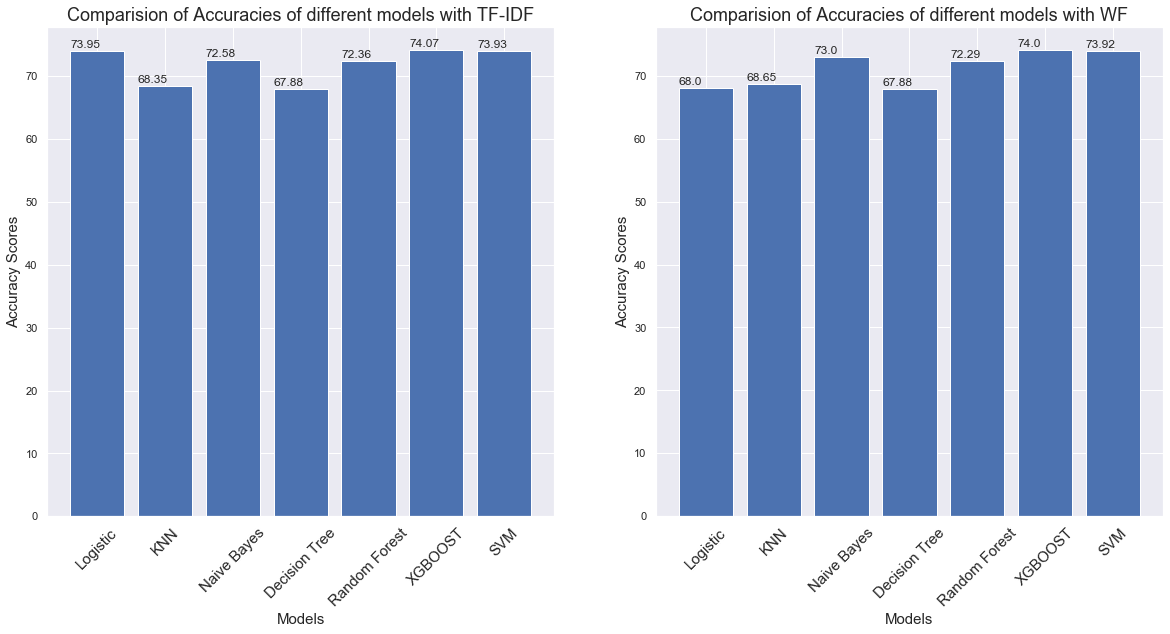

In [692]:
# Bar plot of different accuracies for different models for sentiment dataset

plt.figure(figsize=(20,9))
plt.subplot(121)
bar_tf = plt.bar(models,accuracies_tf)
for bar in bar_tf:
    values = bar.get_height()
    plt.text(bar.get_x(), values + 0.5,values)
plt.xlabel("Models", size=15)
plt.ylabel("Accuracy Scores", size=15)
plt.title("Comparision of Accuracies of different models with TF-IDF" , size =18)
plt.xticks(size=15, rotation =45)

plt.subplot(122)
bar_wf = plt.bar(models,accuracies_wf)
for bar in bar_wf:
    values = bar.get_height()
    plt.text(bar.get_x(), values + 0.5,values)
plt.xlabel("Models", size=15)
plt.ylabel("Accuracy Scores", size=15)
plt.title("Comparision of Accuracies of different models with WF" , size =18)
plt.xticks(size=15, rotation =45)


plt.show()

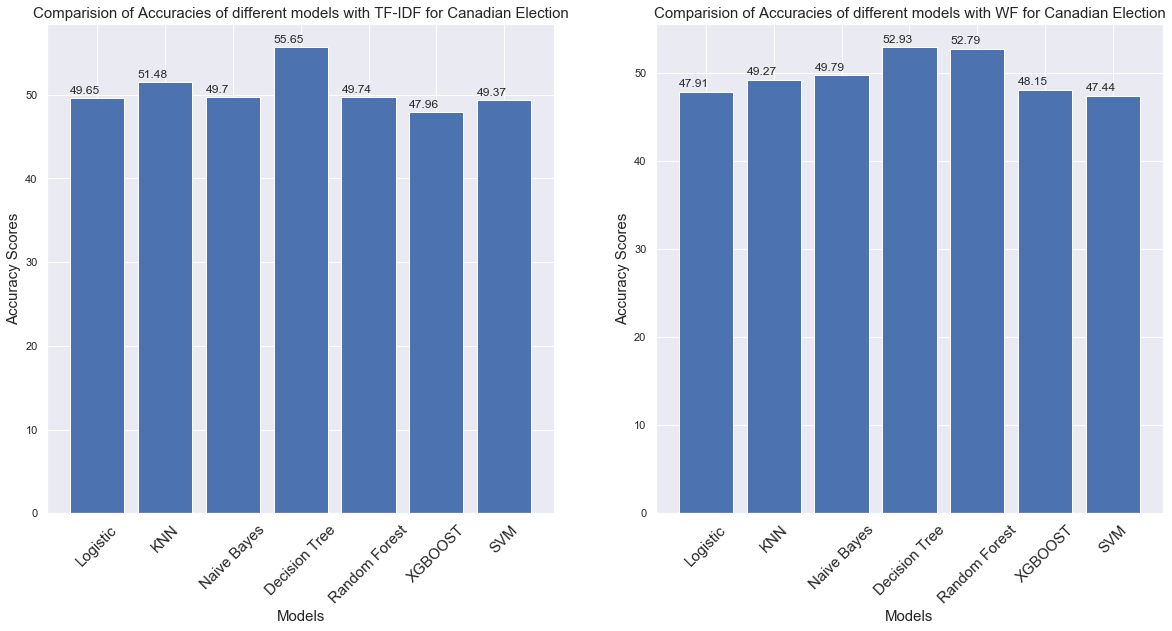

In [693]:
# Bar plot of different accuracies for different models for canadian election dataset

plt.figure(figsize=(20,9))
plt.subplot(121)
bar_tf_ca = plt.bar(models,accuracies_tf_ca)
for bar in bar_tf_ca:
    values = bar.get_height()
    plt.text(bar.get_x(), values + 0.5,values)
plt.xlabel("Models", size=15)
plt.ylabel("Accuracy Scores", size=15)
plt.title("Comparision of Accuracies of different models with TF-IDF for Canadian Election" , size =15)
plt.xticks(size=15, rotation =45)

plt.subplot(122)
bar_wf_ca = plt.bar(models,accuracies_wf_ca)
for bar in bar_wf_ca:
    values = bar.get_height()
    plt.text(bar.get_x(), values + 0.5,values)
plt.xlabel("Models", size=15)
plt.ylabel("Accuracy Scores", size=15)
plt.title("Comparision of Accuracies of different models with WF for Canadian Election" , size =15)
plt.xticks(size=15, rotation =45)


plt.show()

#### FOR SENTIMENT DATASET : 

From the bar plot of the accuracies of different models, it can be seen that XGBOOST has the highest accuracy of 74% in both features (TF-IDF) and (WF).

#### FOR CANADIAN ELECTION DATASET:

From the bar plot of the accuracies of different models, it can be seen that Decision Tree Classifier has the highest accuracy in both features (TF-IDF) and (WF). It has accuracy around 55.65% with TF-IDF and 52.93% with WF. 

So, Decision Tree Classifier has the best accuracy among the different models. I am going to use this model for comparision of the prediction values and original values. 


In [394]:
# adding column of predictied values of decision tree classifier with TF-IDF

ca['predicted_sentiments'] = prediction_dt_ca
ca.head(10)

,text,negative_reason,sentiment,Party,predicted_sentiments
0,instead suggest agre canadian women trust andr...,Women Reproductive right and Racism,0,Conservative,1
1,allwomanspacewalk realnspacest netobicokenorth...,NaN,1,No Party,1
2,brantford go cost 94 billion next 4 year ask j...,Economy,0,Liberal,1
3,canada canadaelection2019 canadavot nelxn43 nn...,NaN,1,No Party,1
4,canada taxpay sick amp tire hard earn donat co...,Economy,0,Liberal,1
5,canadavotes2019 elxn43 cdnpoli fact blastfromt...,Others,0,No Party,1
6,cdnmedia elxn43 cdnpoli ppc rocki dong hand be...,NaN,1,No Party,0
7,cdnpoli elxn43 liber doubl promis 2015 nation ...,NaN,1,NDP,1
8,chooseforward cdnpoli elxn43ncanada dont make ...,Others,0,Liberal,1
9,cpckinsellagatenlet see receipt pay warren kin...,Scandal,0,Liberal,1


### Comparision of predicted sentiments and original sentiments:

From the below plots, It can be seen that there is a change of the number of positive and negative sentiments for each party but the overall trend is almost similar to the original one. For example, the Liberal party has the highest number of positive tweets in the original dataset and in predicted values also, the Liberal party has the highest number of positive tweets, if we ignore "No party's" result. This trend can be seen in the Conservative and NDP party's predicted results also. For the Conservative party, there is more negative tweets in the original dataset whereas in predicted results the number of positive and negative tweets are almost similar.  For NDP, there is a tiny change of the trend in the predicted results compare to the original trend. 

Our predicted results are complying with reality. As in Canada, in the 2019 election "Liberal party" secured the first position and become a ruling party whereas the "Conservative Party" was the second highest voted party and NDP third highest voted party. A similar trend of positive tweets can be seen in our predicted results. 

So, from the below results, we can say that NLP analytics based on tweets is useful for political parties during the election campaign. 

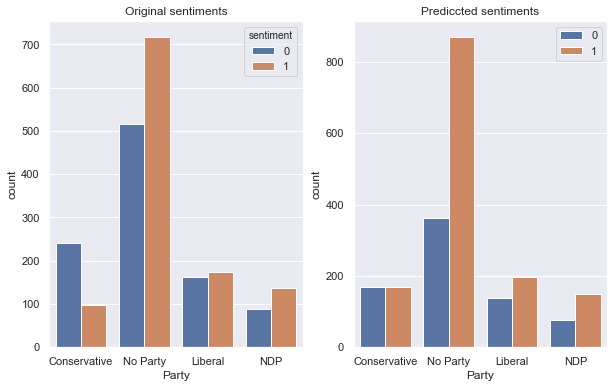

In [217]:
fig, ax =plt.subplots(1,2)

ax1 = sns.countplot(x='Party',data=ca, hue = 'sentiment', ax=ax[0])
ax2 = sns.countplot(x='Party',data=ca, hue = 'predicted_sentiments', ax=ax[1])

sns.set(rc={'figure.figsize':(10,6)})
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
plt.legend(loc=1)
ax1.title.set_text('Original sentiments')
ax2.title.set_text('Prediccted sentiments')
plt.show() 

## MODEL IMPLEMENTATION FOR PREDICTING NEGATIVE REASONS OF CANADIAN ELECTION DATASET

In [295]:
# removing postive sentiments
negative_ca = ca[ca.sentiment != 1]
negative_ca .reset_index(drop=True, inplace=True)

In [296]:
# dropping predicted sentiments as I have to deal with only original sentiments
negative_ca = negative_ca.drop('predicted_sentiments', axis=1)

In [297]:
negative_ca.head(10) # dataset only with negative reasons

,text,negative_reason,sentiment,Party
0,instead suggest agre canadian women trust andr...,Women Reproductive right and Racism,0,Conservative
1,brantford go cost 94 billion next 4 year ask j...,Economy,0,Liberal
2,canada taxpay sick amp tire hard earn donat co...,Economy,0,Liberal
3,canadavotes2019 elxn43 cdnpoli fact blastfromt...,Others,0,No Party
4,chooseforward cdnpoli elxn43ncanada dont make ...,Others,0,Liberal
5,cpckinsellagatenlet see receipt pay warren kin...,Scandal,0,Liberal
6,kinsella run deep w cpcboth lyingandi craze an...,Others,0,Liberal
7,lyingandi histori answer embarrass question on...,Tell lies,0,Conservative
8,urgent pleas watch video david haskel peopl pa...,Scandal,0,No Party
9,b polici comment illeg immor nefari activ cpc ...,Others,0,Liberal


In [298]:
# total count of unique reasons 
negative_ca.negative_reason.value_counts()

Others                                 364
Scandal                                270
Tell lies                              198
Economy                                 51
Women Reproductive right and Racism     45
Climate Problem                         41
Separation                              16
Privilege                               12
Healthcare                               5
Healthcare and Marijuana                 4
Name: negative_reason, dtype: int64

#### Combining some of the negative reasons:

There is a total of 10 negative reasons. I am combining some of them to reduce the classifications.
- I am combining "Tell Lies" and "Scandal" as lying to the public is some sort of scandal. Both definitions seem to be based on the same principle so I am combining these two negative reasons.
- I am also combining " Women Reproductive right and Racism" with "Privilege", as racism means injustice to particular race and privilege means having a bias to a particular race or people which means injustice to other people. So based on these reasons, I am combining these two.
- There is very few of reasons for "Separation", "Healthcare" and "Healthcare and Marijuana". These many numbers will not help our model to predict accurately. So I am combining all these three reasons to "Other" reason.

In [299]:
# defining a dictionary to combine the reasons

negative_reasons = {'Tell lies':'Scandal',
                    'Healthcare and Marijuana': 'Others', 
                    'Women Reproductive right and Racism':'Privilege',
                    'Separation':'Others',
                    'Economy':'Economy',
                    'Climate Problem':'Climate Problem',
                    'Others': 'Others',
                    'Scandal':'Scandal',
                    'Privilege':'Privilege',
                    'Healthcare':'Others'}



In [300]:
#combining the reasons
negative_ca.negative_reason = [negative_reasons[i] for i in negative_ca.negative_reason]

In [301]:
#total counts of the reasons after combining
negative_ca.negative_reason.value_counts()

Scandal            468
Others             389
Privilege           57
Economy             51
Climate Problem     41
Name: negative_reason, dtype: int64

In [302]:
# finding null values in the dataset
round(negative_ca.isnull().mean(axis=0)*100,2)

text               0.0
negative_reason    0.0
sentiment          0.0
Party              0.0
dtype: float64

In [304]:
# label encoding the target data for model implementation

negatives = {'Scandal': 1, 'Others':2,'Privilege':3,'Economy':4,'Climate Problem':5 }
negative_ca.negative_reason = [negatives[i] for i in negative_ca.negative_reason]

In [305]:
negative_ca.head(3)

,text,negative_reason,sentiment,Party
0,instead suggest agre canadian women trust andr...,3,0,Conservative
1,brantford go cost 94 billion next 4 year ask j...,4,0,Liberal
2,canada taxpay sick amp tire hard earn donat co...,4,0,Liberal


### TF-IDF OF NEGATIVE REASONS DATASET

In [313]:
#extracting features from text data using TF-IDF

vectorizer_negative = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word',stop_words="english", 
                            ngram_range=(1, 1), max_df=0.9, min_df=1, max_features=1000)
tf_negative = vectorizer_negative.fit_transform(negative_ca.text)

In [314]:
X_n = tf_negative # feature data
y_n = negative_ca.negative_reason  #target data

In [321]:
# Split the data into 30% test and 70% training
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.3, random_state=0)

#### I am going to use "Decision Tree Classifier", "Random Forest Classifier" and "KNN" to predict Negative reasons of the Canadian Election dataset. The reason behind using choosing these models is, these three have the highest accuracy score among the other models in predicting sentiments. 

### DECISION TREE CLASSIFIER FOR PREDICTING NEGATIVE REASONS

In [322]:
# tuning max_depth to find best accuracy

depth = [1,5,10,15,20,25,35,45,50,100]
for i in depth:
    dt_negative = DecisionTreeClassifier(max_depth = i, random_state = 0) # calling decision treee classifier
    dt_negative.fit(X_n_train, y_n_train) # fitting our model to train data
    prediction_dt_negative = dt_negative.predict(X_n_test)
    print("max_depth", i)
    print("Accuracy score of the decision tree classifier : {0:.3f}".format(dt_negative.score(X_n_test,y_n_test)*100), '%')

max_depth 1
Accuracy score of the decision tree classifier : 49.669 %
max_depth 5
Accuracy score of the decision tree classifier : 55.629 %
max_depth 10
Accuracy score of the decision tree classifier : 59.272 %
max_depth 15
Accuracy score of the decision tree classifier : 60.927 %
max_depth 20
Accuracy score of the decision tree classifier : 60.596 %
max_depth 25
Accuracy score of the decision tree classifier : 61.921 %
max_depth 35
Accuracy score of the decision tree classifier : 62.914 %
max_depth 45
Accuracy score of the decision tree classifier : 60.927 %
max_depth 50
Accuracy score of the decision tree classifier : 60.927 %
max_depth 100
Accuracy score of the decision tree classifier : 55.629 %


In [325]:
# fitting train data with best parameter

dt_negative = DecisionTreeClassifier(max_depth = 35, random_state = 0) # calling decision treee classifier
dt_negative.fit(X_n_train, y_n_train) # fitting our model to train data
prediction_dt_negative = dt_negative.predict(X_n_test)

In [326]:
# finding accuracy of the model
print(classification_report(y_n_test, prediction_dt_negative))

              precision    recall  f1-score   support

           1       0.79      0.51      0.62       146
           2       0.54      0.85      0.66       119
           3       0.43      0.38      0.40         8
           4       0.78      0.37      0.50        19
           5       1.00      0.50      0.67        10

    accuracy                           0.63       302
   macro avg       0.71      0.52      0.57       302
weighted avg       0.69      0.63      0.62       302



### RANDOM FOREST CLASSIFIER FOR PREDICTING NEGATIVE REASONS

In [440]:
#calling random forest classifier
rf_n = RandomForestClassifier()

In [441]:
rf_n.fit(X_n_train, y_n_train)  #fitting training data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [437]:
rf_predict_n = rf_n.predict(X_n_test) # predicting test data

In [443]:
#finding accuracy score 
print(classification_report(y_n_test, rf_predict_n))

              precision    recall  f1-score   support

           1       0.73      0.66      0.69       146
           2       0.62      0.78      0.69       119
           3       0.60      0.38      0.46         8
           4       0.60      0.32      0.41        19
           5       1.00      0.40      0.57        10

    accuracy                           0.67       302
   macro avg       0.71      0.51      0.57       302
weighted avg       0.68      0.67      0.66       302



### KNN CLASSIFIER FOR PREDICTING NEGATIVE REASONS

In [332]:
# calling KNN classifier
knn_n = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn_n.fit(X_n_train, y_n_train) #fitting traing data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [333]:
y_pred_n = knn_n.predict(X_n_test) #predicting test data

In [334]:
# finding accuracy score
score = round(accuracy_score(y_n_test, y_pred_n) * 100  , 3)

print ('The accuracy of the model is:', score, "%")

The accuracy of the model is: 40.397 %


In [445]:
# Comparing accuracies of all the models for predicting negative reasons
accuracies_n = []
models_n = ['Decision Tree', 'Random Forest', 'KNN']
score1_n = round(accuracy_score(y_n_test, prediction_dt_negative) * 100, 2)
score2_n = round(accuracy_score(y_n_test, rf_predict_n) * 100, 2)
score3_n = round(accuracy_score(y_n_test, y_pred_n )*100,2)
accuracies_n.append(score1_n)
accuracies_n.append(score2_n)
accuracies_n.append(score3_n)

([0, 1, 2], <a list of 3 Text xticklabel objects>)

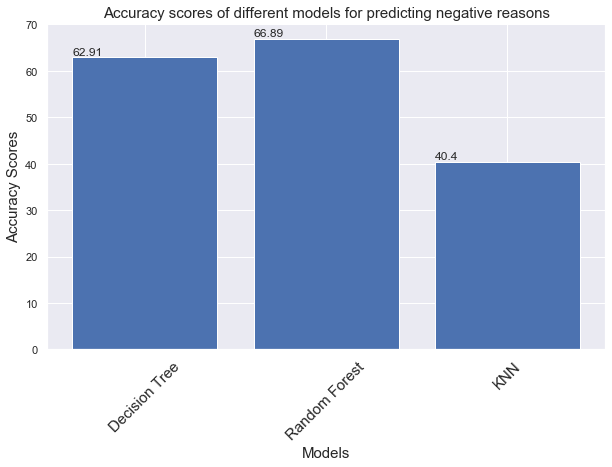

In [446]:
# plotting accuracies
bar_n = plt.bar(models_n,accuracies_n)
for bar in bar_n:
    values = bar.get_height()
    plt.text(bar.get_x(), values + 0.5,values)
plt.xlabel("Models", size=15)
plt.ylabel("Accuracy Scores", size=15)
plt.title("Accuracy scores of different models for predicting negative reasons" , size =15)
plt.xticks(size=15, rotation =45)

### Random Forest Classifier is giving the best accuracy among all models for predicting negative reasons.

## (5) RESULTS_________________________________________________________________

### FOR MODEL - 1:

In [491]:
ca1 = ca[ca.Party != 'No Party'] 

ca1.reset_index(drop=True, inplace=True) 

Text(0.5, 1.0, 'Predicted Sentiments')

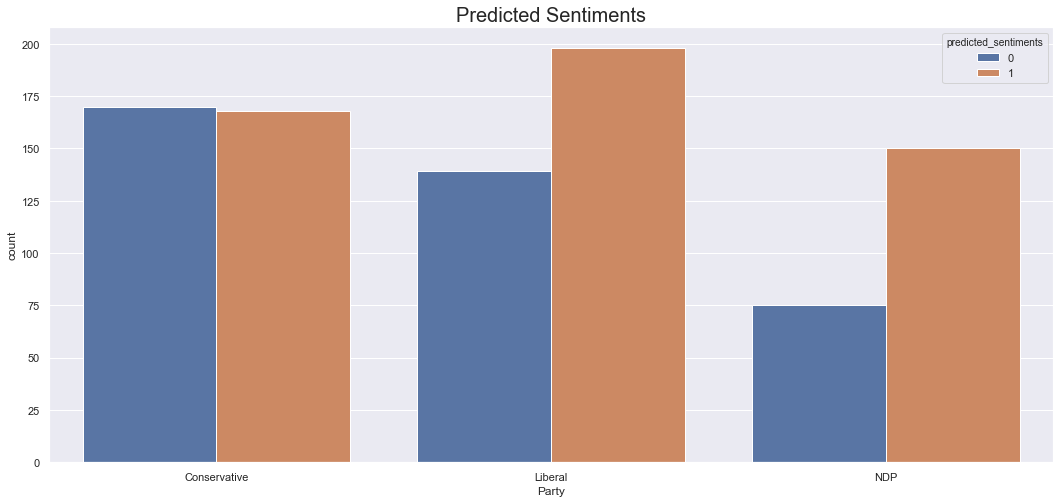

In [492]:
sns.countplot(x='Party',data=ca1, hue = 'predicted_sentiments')
plt.title("Predicted Sentiments",fontsize=20)

- From the predicted sentiments of the best model "Decision Tree Classifier", it can be seen that the Liberal party has the highest number of positive tweets compared to other parties. 

**“What can public opinion on Twitter tell us about the Canadian political landscape in 2019?”**

- From the predicted results, we can say that the public has more inclination towards "The Liberal Party" as they are showing positive sentiments on Twitter for this party.
- "The Conservative Party" has the second highest positive tweets but it has gotten highest negative tweets. From the plot, we can say that the number of people who like "The Conservative Party" is almost the same as the number of people who don't like the party.
- "The NDP" is the third highest party to have positive tweets whereas it has gotten the least negative tweets among all the parties. 
- All these results are almost similar to reality. In 2019, Canadian Election, "The Liberal Party" won by a majority. So, we can say that sentiment analysis on Twitter data for the Canadian Election is helpful in getting some insights for election. 

### FOR MODEL - 2:

### In predicting negative reasons, Random Forest Classifier is giving us the best accuracy which is 66.89%. Due to some reasons our model is not working accurately. First I am going to plot confusion matrix to get insights for Precision and Recall of the model. 

Text(0.5, 1, 'Confusion Matrix for Random Forest Classifier')

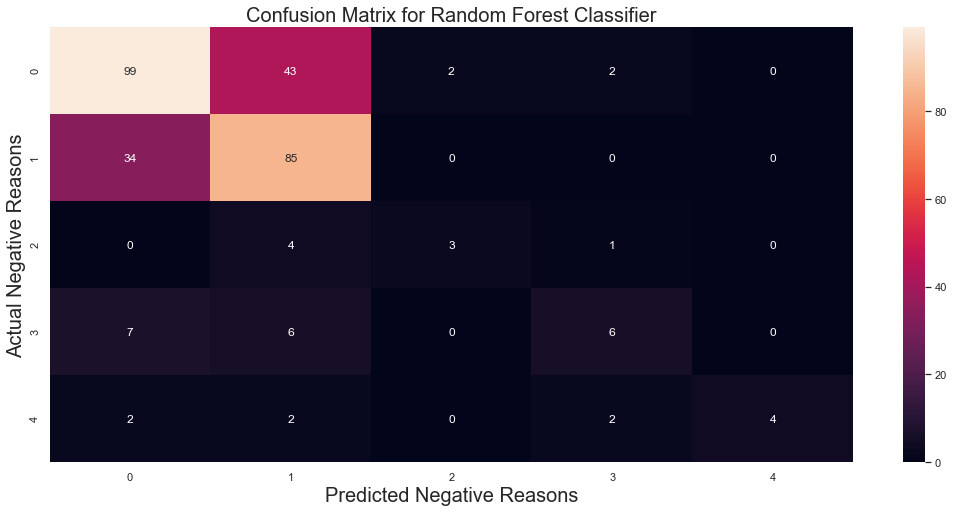

In [493]:
# confusion matrix for random forest
matrix= confusion_matrix(y_n_test, rf_predict_n)
sns.heatmap(matrix, annot=True)
sns.set(rc={'figure.figsize':(18,8)})
plt.xlabel("Predicted Negative Reasons", size = 20)
plt.ylabel("Actual Negative Reasons", size = 20)
plt.title("Confusion Matrix for Random Forest Classifier",size = 20)

In [494]:
negative_ca.negative_reason.value_counts() # total count of different reasons 

1    468
2    389
3     57
4     51
5     41
Name: negative_reason, dtype: int64

- From the confusion matrix, we can see that our model has wrongly predicted some of the 2,3 and 4 target values as 0 and 1. This might be a case of bias because other values are very less compared to 0 and 1 values.So the model is learning more about 0 and 1 values and the model is learning poorly for other values and can not predict accurately for these values. 

In [495]:
# with different number of estimators(random forest) we try to find bias and variance of the model
bias = []
variance = []
totalerror = []

no_estimators = range(1,101) # no of different estimators

for i in no_estimators:
    rf_n = RandomForestClassifier(n_estimators=i)
    rf_n.fit(X_n_train, y_n_train)
    rf_predict_n = rf_n.predict(X_n_test)
    b = np.mean((y_n_test-rf_predict_n)**2) # bias of the model
    v = np.var(rf_predict_n)                # variance of the model
    bias.append(b)                          # saving all the bias errors into bias empty list
    variance.append(v)                      # saving all the variance errors into variance empty list
    totalerror.append(b+v)                  # saving all the total errors into total error empty list 

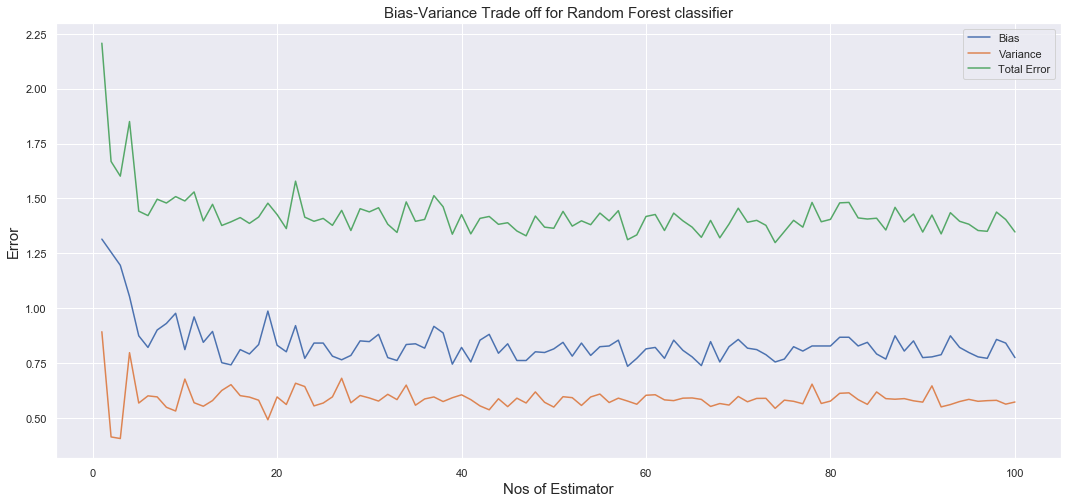

In [496]:
# plotting bias variance tradeoff graph
plt.plot(no_estimators,bias, label = 'Bias')
plt.plot(no_estimators,variance, label = 'Variance')
plt.plot(no_estimators,totalerror, label = "Total Error")
plt.xlabel('Nos of Estimator', size = 15)
plt.ylabel('Error', size = 15)
plt.title("Bias-Variance Trade off for Random Forest classifier", size = 15)
plt.legend()

Bias is high compared to variance.

In [508]:
# making a dataframe with actual and predicted reasons 
column = ['Actual', 'Prediction']
reasons = pd.DataFrame(columns = column)
reasons['Actual'] = y_n_test
reasons['Prediction'] = rf_predict_n

In [539]:
# finding the index number of tweets which has been wrongly predicted by our model 
reasons_n = reasons[(reasons ['Actual'] == 4) & (reasons['Prediction'] != 4)]
reasons_n

,Actual,Prediction
990,4,1
1,4,2
108,4,1
255,4,1
283,4,2
366,4,1
995,4,2
656,4,1
900,4,2
181,4,2


In [516]:
#negatives = {'Scandal': 1, 'Others':2,'Privilege':3,'Economy':4,'Climate Problem':5 }

In [540]:
ca.text[990]

'brobynurback 600000000 media bailout promis fall rule 2 robynncdnpoli nelxn43 elxnnelxn2019'

In [542]:
ca.text[728]

'bcbcalert oh noe someon lose teflon coatingntrudeaumustgo nscheerhypocrisi nscheermustgoncdnpoli nelxn43 npeoplespca nmaximeberni'

In [543]:
# finding index number of tweets which has been wrongly predicted by our model
reasons[(reasons ['Actual'] == 5) & (reasons['Prediction'] != 5)]

,Actual,Prediction
482,5,1
362,5,1
60,5,2
531,5,4
520,5,2
113,5,4


In [529]:
ca.text[520]

'weve got primer everi york region ride head monday vote elxn43 cdnpoli vote2019'

In [530]:
ca.text[113]

'hope peopl vote earli today revel parti hire wk smear ppc make wonder els done robocal bc fake news social media seem low scheerdisast wont drop elxn43'

- As we can see that there are so many wrongly predicted reasons by our model.
- For index number 990 the actual reason is 4 ("Economy") however our model predicts "Scandal/ Tell lies"( As I have combined these two reasons). From the text of the tweet, it can be seen that there is no particular word of economy related but might be due to the "promis" word in the cleaned text, our model is predicting 1 value("Scandal/ Tell lies").
- Also for index number 728, there is no particular word related to economy but our model is predicting 1 ("Scandal/ Tell lies").
- For index number 520, there is no climate related word and that is why it has been predicted by our model in "Other" category.


### How to improve the accuracy of the model?

- There are several pitfalls of sentiment analysis. 
- To improve the accuracy we need to use different feature extraction methods compared to WF and TF-IDF which can deal with different types of negations, word ambiguity, and multipolarity of the given text.
- The problem with TF-IDF approach is, it deals with each and every words individually and it is converted into its numeric counterpart. WF and TF-IDF do not help in retaining context information.N-Grams model works well in capturing contextual information. Word embedding method(word2vec) is also helpful in extracting semantic similarity in the text.
- We can increase the number of samples so that the model can learn each minute information and can predict well.
- Deep Neural Networks(DNN) are gaining popularity in the detection of sentiments. A study suggests that a convolutional neural network, a long-short term memory(LSTM) Network and recurrent neural network (RNN) or the combination of all these networks can give us the best accuracy. 

## (6) BONUS PART____________________________________________________________

## WORD EMBEDDING (WORD2VEC)

In [611]:
tokenized_sentences_df = [sentence.split() for sentence in df1.text] # tokenizing strings in sentiment dataset
word_emb = word2vec.Word2Vec(tokenized_sentences_df, size=100, min_count=1) # applying word2vec 

In [612]:
word_emb .wv['liber']

array([-0.2853859 ,  0.01414874, -0.4092778 ,  0.26861244, -0.48379564,
       -0.05454801, -0.04791937, -0.16784392,  0.4155952 ,  0.00637805,
        0.01679109, -0.00620978, -0.48634094, -0.09002894, -0.5206704 ,
        0.22033949,  0.43625906, -0.06270286,  0.15620351,  0.40490386,
       -0.07909279, -0.35259002, -0.1927456 ,  0.2311825 , -0.05431836,
        0.11396635, -0.0243368 ,  0.14874636,  0.11122521,  0.28392988,
       -0.2870027 ,  0.03109351,  0.02259752,  0.20152065, -0.48352668,
       -0.37151396,  0.3590565 ,  0.08394732,  0.09362613,  0.17756344,
       -0.16912515, -0.20627072, -0.5254813 , -0.04485934, -0.29324847,
        0.24825504, -0.17884886, -0.05130162,  0.05778319,  0.29262194,
       -0.22222787,  0.02446611,  0.07294749,  0.03678128, -0.02399592,
       -0.43637168,  0.05458687,  0.06993598, -0.45351377,  0.5041583 ,
       -0.3918871 ,  0.0711171 ,  0.02291302,  0.06032263, -0.0102279 ,
        0.0635834 ,  0.01716345,  0.22329672, -0.12473354,  0.08

In [613]:
word_emb.wv.most_similar(['liber'])

[('polici', 0.9839873313903809),
 ('foxnew', 0.9837405681610107),
 ('bia', 0.9832062721252441),
 ('trump2016', 0.9825011491775513),
 ('wakeupamerica', 0.9789040088653564),
 ('donaldtrump', 0.9785805344581604),
 ('applaus', 0.978451132774353),
 ('ccot', 0.9784409999847412),
 ('megynkelli', 0.9778908491134644),
 ('tcot', 0.9771301746368408)]

In [614]:
def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    if text == "":
        return vec
    else:
        text = text.split(' ')
        for word in text:
            vec += word_emb.wv[word].reshape((1, size))
            count += 1.
    if count != 0:
        vec /= count
    return vec

In [615]:
array_wordEmbedding_df = np.concatenate([buildWordVector(z, 100) for z in df1.text])

In [616]:
X_w = array_wordEmbedding_df # feature 
y_w = df1.sentiment         # target

In [617]:
tokenized_sentences_ca = [sentence.split() for sentence in ca.text]  # tokenizing strings in canadian election dataset
word_emb_ca = word2vec.Word2Vec(tokenized_sentences_ca, size=100, min_count=1) # applying word2vec 

In [705]:
def buildWordVectorca(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    if text == "":
        return vec
    else:
        text = text.split(' ')
        for word in text:
            vec += word_emb_ca.wv[word].reshape((1, size))
            count += 1.
    if count != 0:
        vec /= count
    return vec

In [706]:
array_wordEmbedding_ca = np.concatenate([buildWordVectorca(z, 100) for z in ca.text])

In [707]:
X_ca_word = array_wordEmbedding_ca #feature
y_ca_word = ca.sentiment        #target

In [592]:
# Split the data into 30% test and 70% training
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w, y_w, test_size=0.3, random_state=0)

### DECISION TREE CLASSIFIER WITH WORD2VEC

In [593]:
# tuning max_depth parameter to get best accuracy
depth = [1,5,10,15,20,25,35,45,50,100]
for i in depth:
    dt_word = DecisionTreeClassifier(max_depth = i, random_state = 0) # calling decision treee classifier
    dt_word.fit(X_w_train, y_w_train) # fitting our model to train data
    prediction_dt_word = dt_word.predict(X_w_test)
    print("max_depth", i)
    print("Accuracy score of the decision tree classifier : {0:.3f}".format(dt_word.score(X_w_test,y_w_test)*100), '%')

max_depth 1
Accuracy score of the decision tree classifier : 62.136 %
max_depth 5
Accuracy score of the decision tree classifier : 67.557 %
max_depth 10
Accuracy score of the decision tree classifier : 68.725 %
max_depth 15
Accuracy score of the decision tree classifier : 66.685 %
max_depth 20
Accuracy score of the decision tree classifier : 64.904 %
max_depth 25
Accuracy score of the decision tree classifier : 64.468 %
max_depth 35
Accuracy score of the decision tree classifier : 63.552 %
max_depth 45
Accuracy score of the decision tree classifier : 63.868 %
max_depth 50
Accuracy score of the decision tree classifier : 63.868 %
max_depth 100
Accuracy score of the decision tree classifier : 63.868 %


In [594]:
dt_word = DecisionTreeClassifier(max_depth = 10, random_state = 0) # calling decision treee classifier
dt_word.fit(X_w_train, y_w_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [709]:
prediction_dt_word = dt_word.predict(X_w_test)
print("Accuracy score of the decision tree classifier : {0:.3f}".format(dt_word.score(X_w_test,y_w_test)*100), '%')

Accuracy score of the decision tree classifier : 68.725 %


### DECISION TREE CLASSIFIER FOR CANADIAN ELECTION DATASET WITH WORD2VEC

In [712]:
prediction_dt_ca_word = dt_word.predict(X_ca_word)
print("Accuracy score of the decision tree classifier : {0:.3f}".format(dt_word.score(X_ca_word,y_ca_word)*100), '%')

Accuracy score of the decision tree classifier : 52.508 %


### NEURAL NETWORK MLP CLASSIFIER WITH WORD2VEC (MULTILAYER PERCEPTRON)

In [713]:
neural_model_word = MLP(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
                                                 max_iter=1000, shuffle=True, tol=0.0001,momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=10)

In [714]:
neural_model_word.fit(X_w_train, y_w_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [715]:
neural_predict_word = neural_model_word.predict(X_w_test)

In [716]:
print("Accuracy score of Neural Network Model : " , round(accuracy_score(y_w_test, neural_predict_word )*100,2))

Accuracy score of Neural Network Model :  73.84


### NEURAL NETWORK MLP CLASSIFIER FOR CANADIAN ELECTION DATASET WITH WORD2VEC

In [717]:
neural_predict_ca_word = neural_model_word.predict(X_ca_word)

In [718]:
print("Accuracy score of Neural Network Model : " , round(accuracy_score(y_ca_word, neural_predict_ca_word  )*100,2))

Accuracy score of Neural Network Model :  52.84


## N- GRAMS

### BIGRAMS

In [647]:
# Converting text data of sentiment data set 
vectorizer_3 = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word',stop_words="english", 
                            ngram_range=(2, 2), max_df=0.9, min_df=1, max_features=1000)
tf_3 = vectorizer_3.fit_transform(df1.text)

In [648]:
# Converting text data of canadian election data set
vectorizer_ca_3 = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word',stop_words="english", 
                            ngram_range=(2, 2), max_df=0.9, min_df=1, max_features=1000)
tf_ca_3 = vectorizer_ca.fit_transform(ca.text)

In [649]:
X_t = tf_3 
y_t = df1.sentiment
X_ca_t = tf_ca_3
y_ca_t = ca.sentiment

In [650]:
# Split the sentiment data into 30% test and 70% training
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X_t, y_t, test_size=0.3, random_state=0)

### KNN WITH N-GRAMS

In [651]:
# tuning number of neighbors in KNN classifier 
n = [1,3,5,10,15]
for i in n:
    knn_t = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn_t.fit(X_t_train, y_t_train)
    y_pred_t= knn_t.predict(X_t_test)
    print("n_neighbors", i)
    print("Accuracy score of the KNN classifier : {0:.3f}".format(accuracy_score(y_t_test, y_pred_t) * 100), '%')

n_neighbors 1
Accuracy score of the KNN classifier : 53.608 %
n_neighbors 3
Accuracy score of the KNN classifier : 54.636 %
n_neighbors 5
Accuracy score of the KNN classifier : 58.672 %
n_neighbors 10
Accuracy score of the KNN classifier : 59.067 %
n_neighbors 15
Accuracy score of the KNN classifier : 59.205 %


In [663]:
#fitting best parameter in the model

knn_t = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
knn_t.fit(X_t_train, y_t_train)
y_pred_t = knn_t.predict(X_t_test)

In [664]:
#accuracy of the model

score = round(accuracy_score(y_t_test, y_pred_t) * 100  , 3)

print ('The accuracy of the model is:', score, "%")

The accuracy of the model is: 59.205 %


### KNN FOR CANADIAN ELECTION DATASET WITH N-GRAMS

In [665]:
y_pred_ca_t = knn_t.predict(X_ca_t)

#accuracy of the model

score = round(accuracy_score(y_ca_t, y_pred_ca_t) * 100  , 3)

print ('The accuracy of the model is:', score, "%")


The accuracy of the model is: 48.008 %


### DECISION TREE FOR N-GRAMS

In [655]:
# tuning max_depth parameter to get best accuracy
depth = [1,10,20,25,50,100]
for i in depth:
    dt_t = DecisionTreeClassifier(max_depth = i, random_state = 0) # calling decision treee classifier
    dt_t.fit(X_t_train, y_t_train) # fitting our model to train data
    prediction_dt_t = dt_t.predict(X_t_test)
    print("max_depth", i)
    print("Accuracy score of the decision tree classifier : {0:.3f}".format(dt_t.score(X_t_test,y_t_test)*100), '%')

max_depth 1
Accuracy score of the decision tree classifier : 54.682 %
max_depth 10
Accuracy score of the decision tree classifier : 55.590 %
max_depth 20
Accuracy score of the decision tree classifier : 56.070 %
max_depth 25
Accuracy score of the decision tree classifier : 56.223 %
max_depth 50
Accuracy score of the decision tree classifier : 56.486 %
max_depth 100
Accuracy score of the decision tree classifier : 57.085 %


In [656]:
dt_t = DecisionTreeClassifier(max_depth = 100, random_state = 0) # calling decision treee classifier
dt_t.fit(X_t_train, y_t_train) # fitting our model to train data

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### DECISION TREE CLASSIFIER FOR CANADIAN ELECTION DATASET

In [657]:
print("Accuracy score of the decision tree classifier : {0:.3f}".format(dt_t.score(X_ca_t,y_ca_t)*100), '%')

Accuracy score of the decision tree classifier : 48.664 %


### RANDOM FOREST

In [658]:
# calling random forest classifier
rf_t = RandomForestClassifier()
rf_t.fit(X_t_train,y_t_train)  #fitting training data of sentiment dataset

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [659]:
rf_predict_t = rf_t.predict(X_t_test) # predicting sentiments of test data

In [660]:
# 10 fold cross validation for finding best accuracy of the model 
rf_cv_score_t = cross_val_score(rf_t, X_t_train, y_t_train, cv=10, scoring="roc_auc")

In [729]:
print(classification_report(y_t_test, rf_predict_t))

print("Mean AUC Score - Random Forest classifier for sentiment dataset : ", rf_cv_score_t.mean()*100)

              precision    recall  f1-score   support

           0       0.58      0.92      0.71     21436
           1       0.68      0.20      0.31     17765

    accuracy                           0.60     39201
   macro avg       0.63      0.56      0.51     39201
weighted avg       0.63      0.60      0.53     39201

Mean AUC Score - Random Forest classifier for sentiment dataset :  63.77335919974504


### RANDOM FOREST CLASSIFIER FOR CANADIAN ELECTION DATASET

In [662]:
# classification report for canadian dataset
rf_predict_ca_t = rf_t.predict(X_ca_t)
print(classification_report(y_ca_t, rf_predict_ca_t ))

              precision    recall  f1-score   support

           0       0.47      0.71      0.57      1006
           1       0.53      0.29      0.37      1127

    accuracy                           0.49      2133
   macro avg       0.50      0.50      0.47      2133
weighted avg       0.50      0.49      0.46      2133



### NEURAL NETWORK MLP CLASSIFIER WITH N-GRAMS

In [696]:
neural_model = MLP(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
                                                 max_iter=1000, shuffle=True, tol=0.0001,momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=10)

In [697]:
neural_model.fit(X_t_train,y_t_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [698]:
neural_predict = neural_model.predict(X_t_test) 

In [699]:
print("Accuracy score of Neural Network Model : " , round(accuracy_score(y_t_test, neural_predict )*100,2))

Accuracy score of Neural Network Model :  59.49


### MLP CLASSIFIER FOR CANADIAN ELECTION DATASET WITH N-GRAMS

In [700]:
neural_predict_ca = neural_model.predict(X_ca_t) #predicting target values fpr canadian election

In [701]:
print("Accuracy score of Neural Network Model : " , round(accuracy_score(y_ca_t, neural_predict_ca  )*100,2))

Accuracy score of Neural Network Model :  51.24


In [723]:
accuracies_word = []  # Accuracy list for canadian election dataset
accuracies_gram = []

# list of different models
models_word = ['Decision Tree','MLP']
models_n = ['KNN','Decision Tree','Random Forest','MLP']

###########################################################################################################################
##################################### Accuracies for canadian election dataset with word embedding#########################
###########################################################################################################################
score1_word = round(dt_word.score(X_ca_word,y_ca_word) * 100, 2)
score2_word = round(accuracy_score(y_ca_word, neural_predict_ca_word ) * 100, 2)

accuracies_word.append(score1_word)
accuracies_word.append(score2_word)

###########################################################################################################################
##################################### Accuracies for canadian election dataset with N-grams ###############################
###########################################################################################################################
score1_n = round(accuracy_score(y_ca_t, y_pred_ca_t) * 100, 2)
score2_n = round(dt_t.score(X_ca_t,y_ca_t)*100, 2)
score3_n = round(accuracy_score(y_ca_t, rf_predict_ca_t) * 100, 2)
score4_n = round(accuracy_score(y_ca_t, neural_predict_ca ) * 100, 2)

accuracies_gram.append(score1_n)
accuracies_gram.append(score2_n)
accuracies_gram.append(score3_n)
accuracies_gram.append(score4_n)


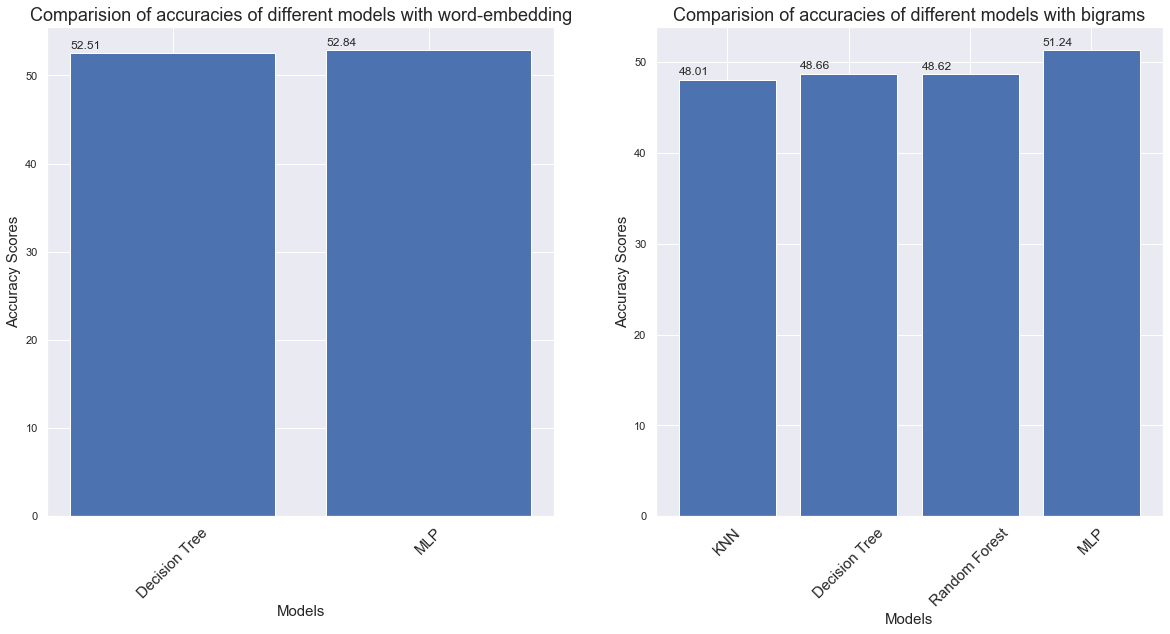

In [731]:
# Bar plot of different accuracies for different models for canadian election dataset

plt.figure(figsize=(20,9))
plt.subplot(121)
bar_word = plt.bar(models_word,accuracies_word)
for bar in bar_word:
    values = bar.get_height()
    plt.text(bar.get_x(), values + 0.5,values)
plt.xlabel("Models", size=15)
plt.ylabel("Accuracy Scores", size=15)
plt.title("Comparision of accuracies of different models with word-embedding" , size =18)
plt.xticks(size=15, rotation =45)

plt.subplot(122)
bar_gram = plt.bar(models_n,accuracies_gram)
for bar in bar_gram:
    values = bar.get_height()
    plt.text(bar.get_x(), values + 0.5,values)
plt.xlabel("Models", size=15)
plt.ylabel("Accuracy Scores", size=15)
plt.title("Comparision of accuracies of different models with bigrams" , size =18)
plt.xticks(size=15, rotation =45)


plt.show()

- As we can see that in Word2Vec, MLP and Decision tree models are giving us almost the same accuracy whereas Bigrams MLP has the highest accuracy compared to other models.
- But these accuracies are not as good as I am getting in TF-IDF with Decision tree classifier(56%).